# Packages

In [ ]:
! pip install prince

In [ ]:
! pip install dtaidistance

In [ ]:
! pip install tslearn

In [ ]:
! pip install pyclustering

In [ ]:
! pip install statsmodels

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


In [ ]:
! pip install pyramid-arima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prince
from scipy.cluster import hierarchy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from dtaidistance import dtw_ndim # for dtw distance
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans # kmeans
from sklearn.cluster import SpectralClustering # spectralClustering
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer # initialiser kmedoids
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score, confusion_matrix
from tslearn.piecewise import SymbolicAggregateApproximation # sax
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from pmdarima import auto_arima

# Chargement des données et visualisation

In [ ]:
acce_x = pd.read_table("/content/drive/MyDrive/allou/acce_x.txt", sep=" ",header=None)
acce_y = pd.read_table("/content/drive/MyDrive/allou/acce_y.txt", sep=" ",header=None)
acce_z = pd.read_table("/content/drive/MyDrive/allou/acce_z.txt", sep=" ",header=None)

accm_x = pd.read_table("/content/drive/MyDrive/allou/accm_x.txt", sep=" ",header=None)
accm_y = pd.read_table("/content/drive/MyDrive/allou/accm_y.txt", sep=" ",header=None)
accm_z = pd.read_table("/content/drive/MyDrive/allou/accm_z.txt", sep=" ",header=None)

vit_x = pd.read_table("/content/drive/MyDrive/allou/vit_x.txt", sep=" ",header=None)
vit_y = pd.read_table("/content/drive/MyDrive/allou/vit_y.txt", sep=" ",header=None)
vit_z = pd.read_table("/content/drive/MyDrive/allou/vit_z.txt", sep=" ",header=None)

labels = pd.read_table("/content/drive/MyDrive/allou/lab.txt", sep=" ",header=None)

In [ ]:
classes = {1:"Marcher", 2:"Monter les escaliers", 3:"Descendre les escaliers", 4:"S'asseoir",
           5:"Se lever", 6:"S'allonger"}
np.unique(labels.values)

array([1, 2, 3, 4, 5, 6])

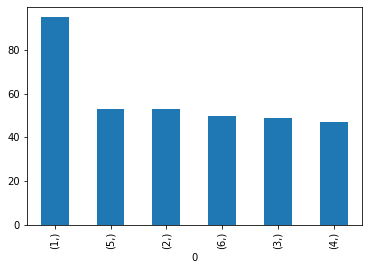

In [ ]:
# Nombre d'observation par classe
labels.value_counts().plot.bar()

In [ ]:
def plot_centers(model, num_cluster_center):
  
  center = model.cluster_centers_[num_cluster_center]
  plt.figure(figsize=(20,15))

  plt.subplot(3,3,1)
  plt.plot(center[:,0])
  plt.title(f"center cluster 0 acce_x")
  plt.subplot(3,3,2)
  plt.plot(center[:,1])
  plt.title(f"center cluster 0 acce_y")
  plt.subplot(3,3,3)
  plt.plot(center[:,2])
  plt.title(f"center cluster 0 acce_z")
  plt.subplot(3,3,4)
  plt.plot(center[:, 3])
  plt.title(f"center cluster 0 accm_x")
  plt.subplot(3,3,5)
  plt.plot(center[:,4])
  plt.title(f"center cluster 0 accm_y")
  plt.subplot(3,3,6)
  plt.plot(center[:,5])
  plt.title(f"center cluster 0 accm_z")
  plt.subplot(3,3,7)
  plt.plot(center[:,6])
  plt.title(f"center cluster 0 vit_x")
  plt.subplot(3,3,8)
  plt.plot(center[:,7])
  plt.title(f"center cluster 0 vit_y")
  plt.subplot(3,3,9)
  plt.plot(center[:,8])
  plt.title(f"center cluster 0 vit_z")
  plt.show()

In [ ]:
def plot_activity(activite):
  index = list(labels.values).index(activite)
  plt.figure(figsize=(20,15))

  plt.subplot(3,3,1)
  plt.plot(np.linspace(0.02,2.56,128), acce_x.iloc[index,:])
  plt.title(f"acce_x, activité = {classes[activite]}")
  plt.subplot(3,3,2)
  plt.plot(np.linspace(0.02,2.56,128), acce_y.iloc[index,:])
  plt.title(f"acce_y, activité = {classes[activite]}")
  plt.subplot(3,3,3)
  plt.plot(np.linspace(0.02,2.56,128), acce_z.iloc[index,:])
  plt.title(f"acce_z, activité = {classes[activite]}")
  plt.subplot(3,3,4)
  plt.plot(np.linspace(0.02,2.56,128), accm_x.iloc[index,:])
  plt.title(f"accm_x, activité = {classes[activite]}")
  plt.subplot(3,3,5)
  plt.plot(np.linspace(0.02,2.56,128), accm_y.iloc[index,:])
  plt.title(f"accm_y, activité = {classes[activite]}")
  plt.subplot(3,3,6)
  plt.plot(np.linspace(0.02,2.56,128), accm_z.iloc[index,:])
  plt.title(f"accm_z, activité = {classes[activite]}")
  plt.subplot(3,3,7)
  plt.plot(np.linspace(0.02,2.56,128), vit_x.iloc[index,:])
  plt.title(f"vit_x, activité = {classes[activite]}")
  plt.subplot(3,3,8)
  plt.plot(np.linspace(0.02,2.56,128), vit_y.iloc[index,:])
  plt.title(f"vit_y, activité = {classes[activite]}")
  plt.subplot(3,3,9)
  plt.plot(np.linspace(0.02,2.56,128), vit_z.iloc[index,:])
  plt.title(f"vit_z, activité = {classes[activite]}")
  plt.show()

In [ ]:
def scores(true_labels, pred_labels):
  print("NMI: ", normalized_mutual_info_score(true_labels, pred_labels))
  print("ARI: ", adjusted_rand_score(true_labels, pred_labels))

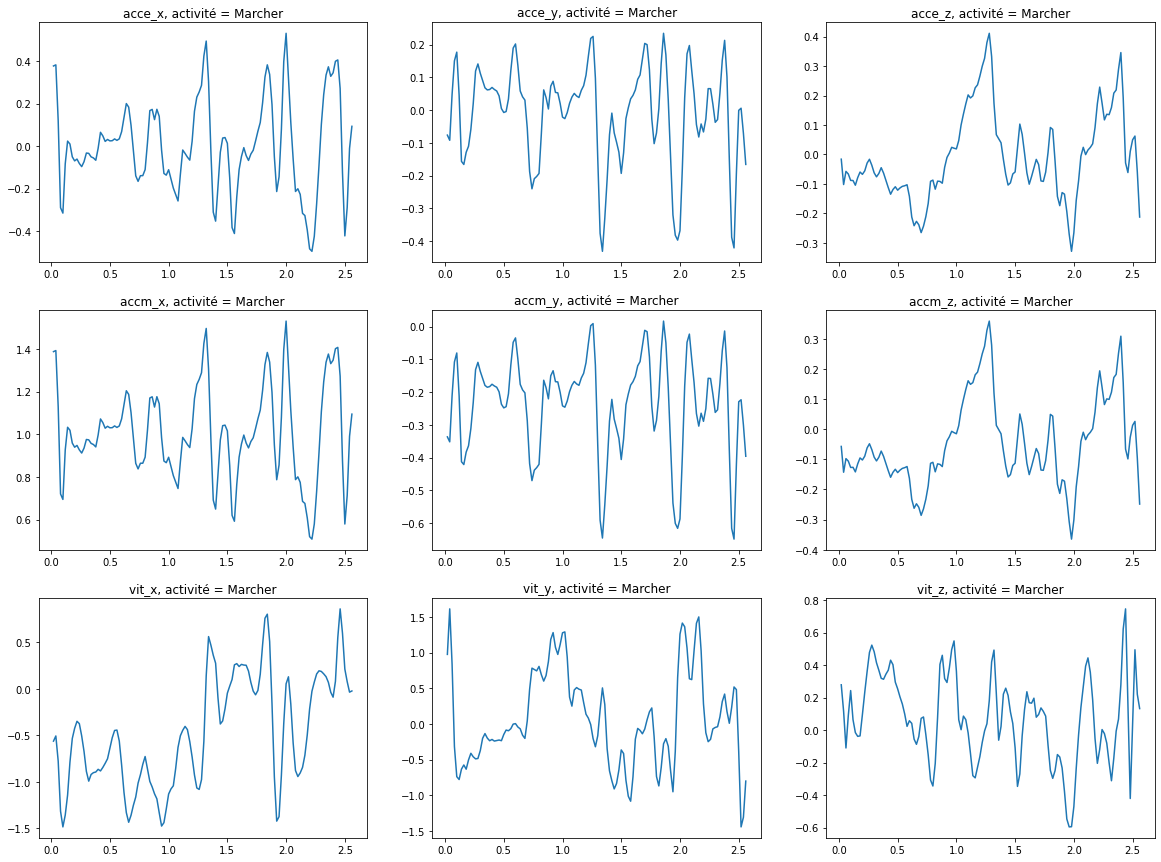

In [ ]:
# Activité d'une personne en marche
plot_activity(1)

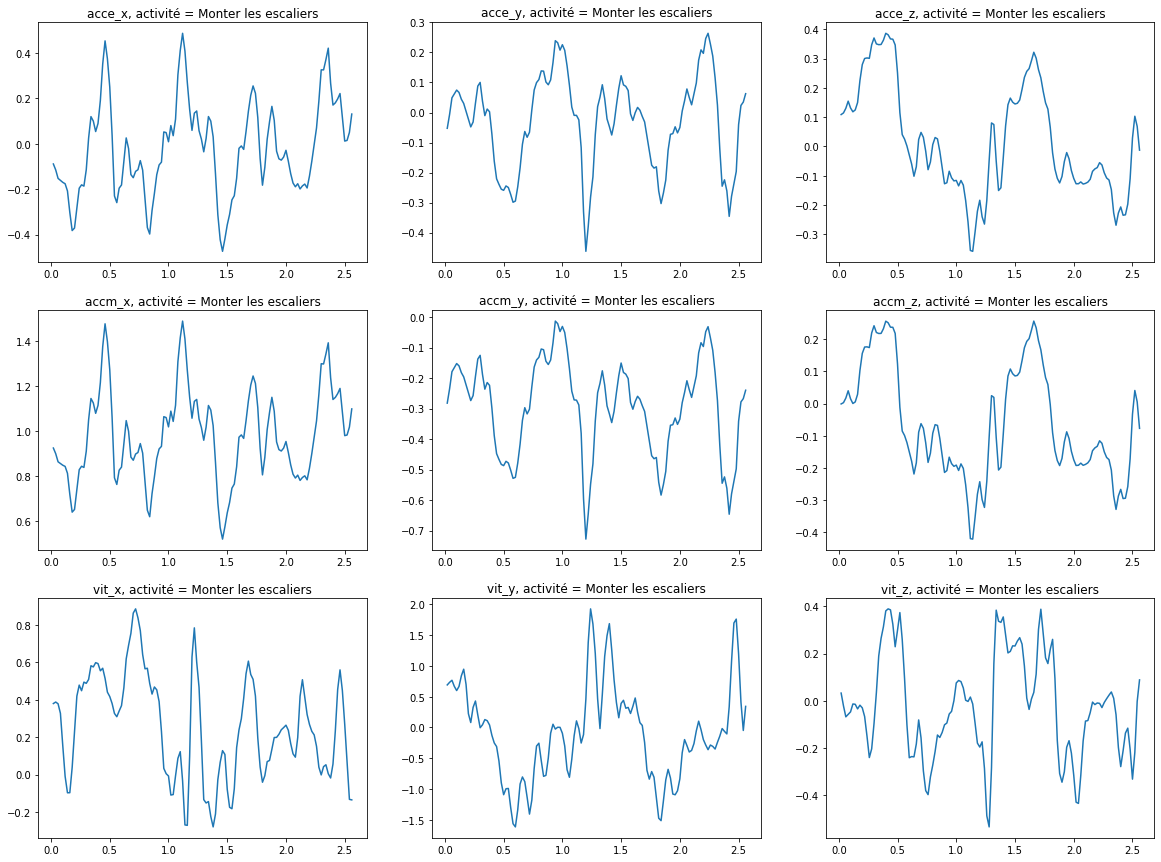

In [ ]:
# Activité d'une personne qui monte des escaliers
plot_activity(2)

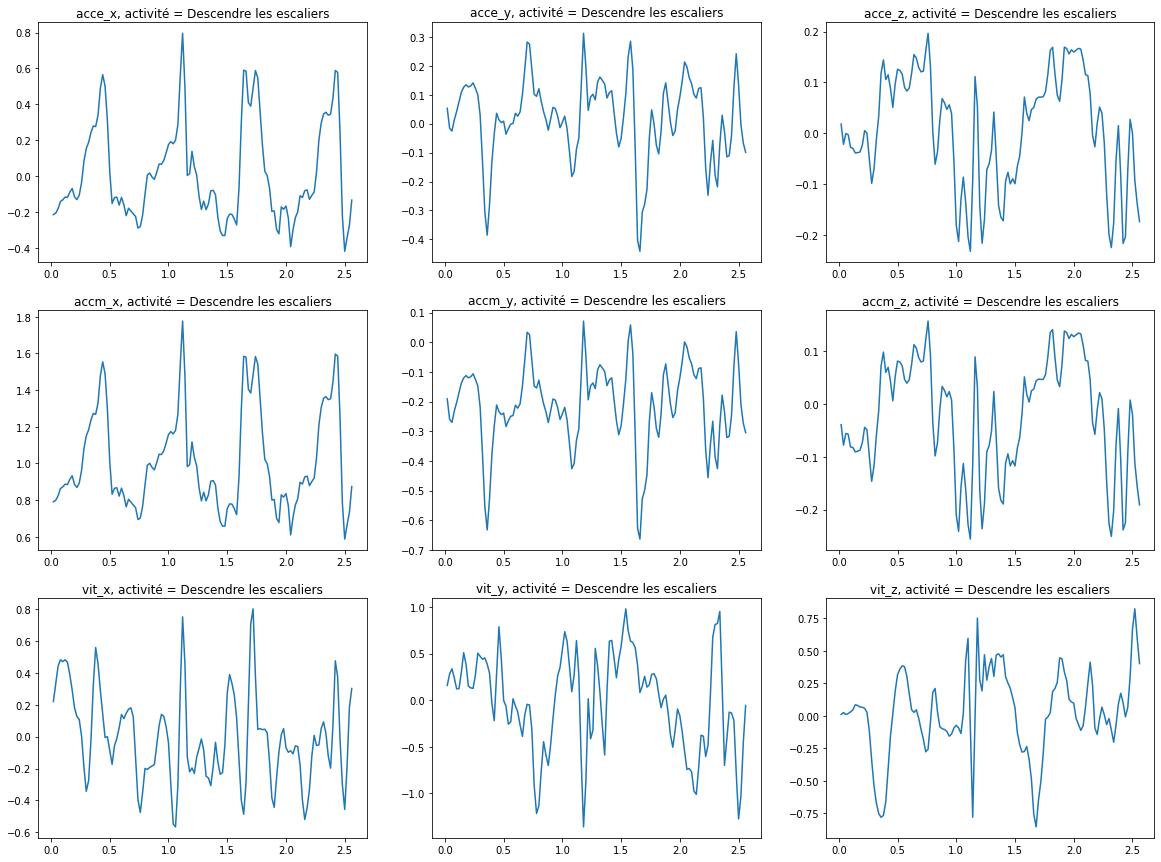

In [ ]:
# Acti  vité d'une personne qui descend des escaliers
plot_activity(3)

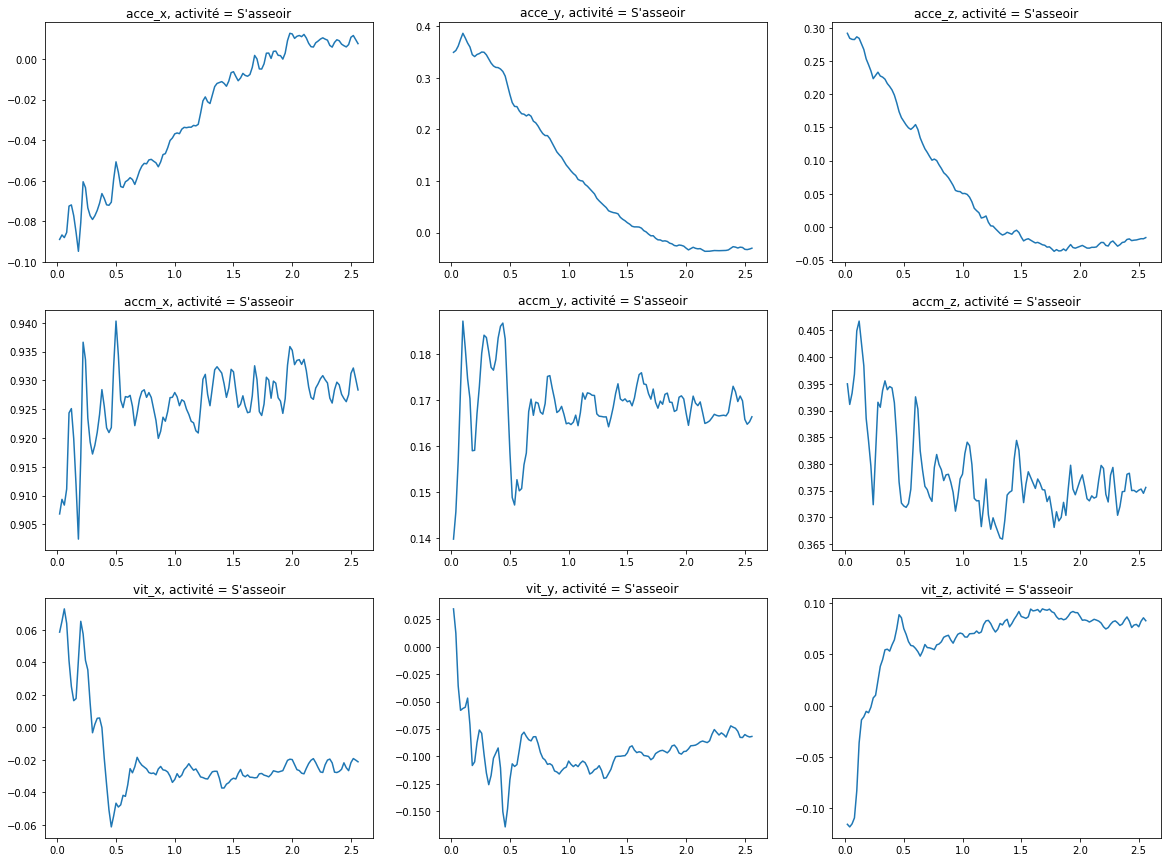

In [ ]:
# Activité d'une personne qui est assise
plot_activity(4)

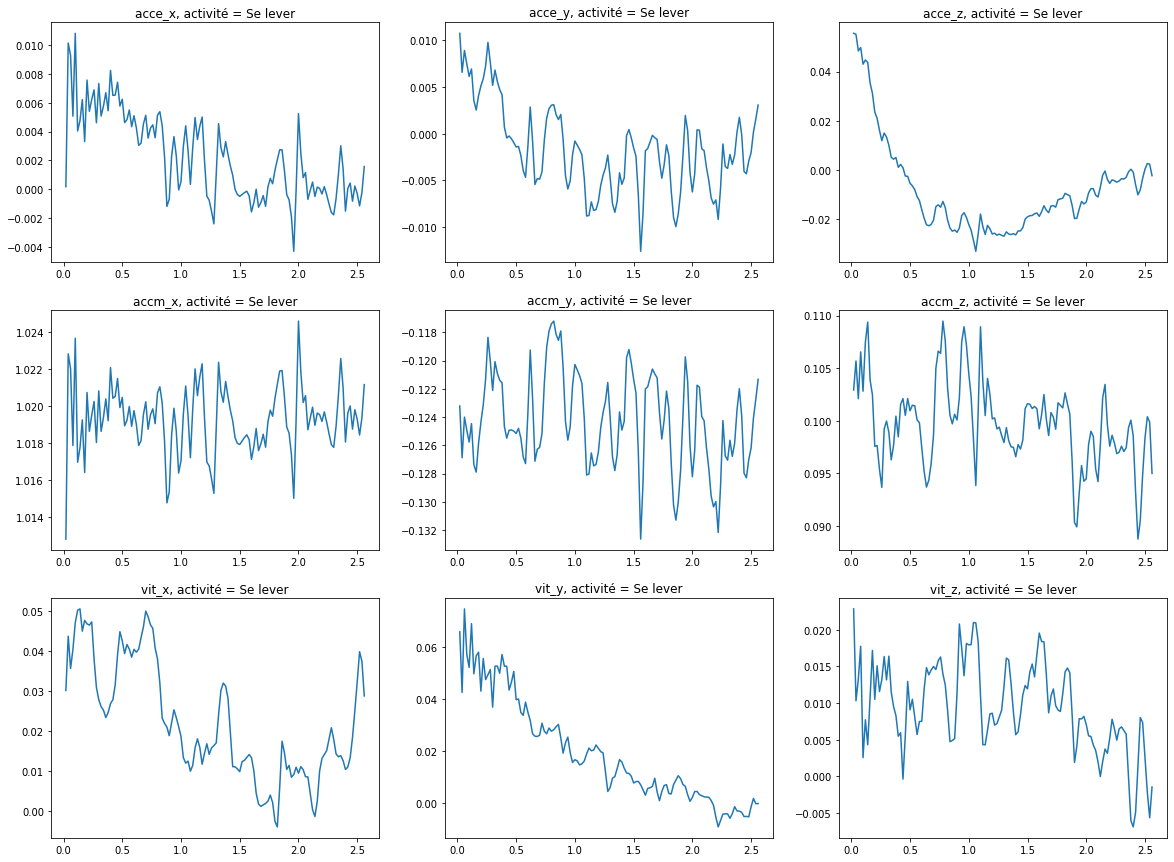

In [ ]:
# Activité d'une personne qui se lève
plot_activity(5)

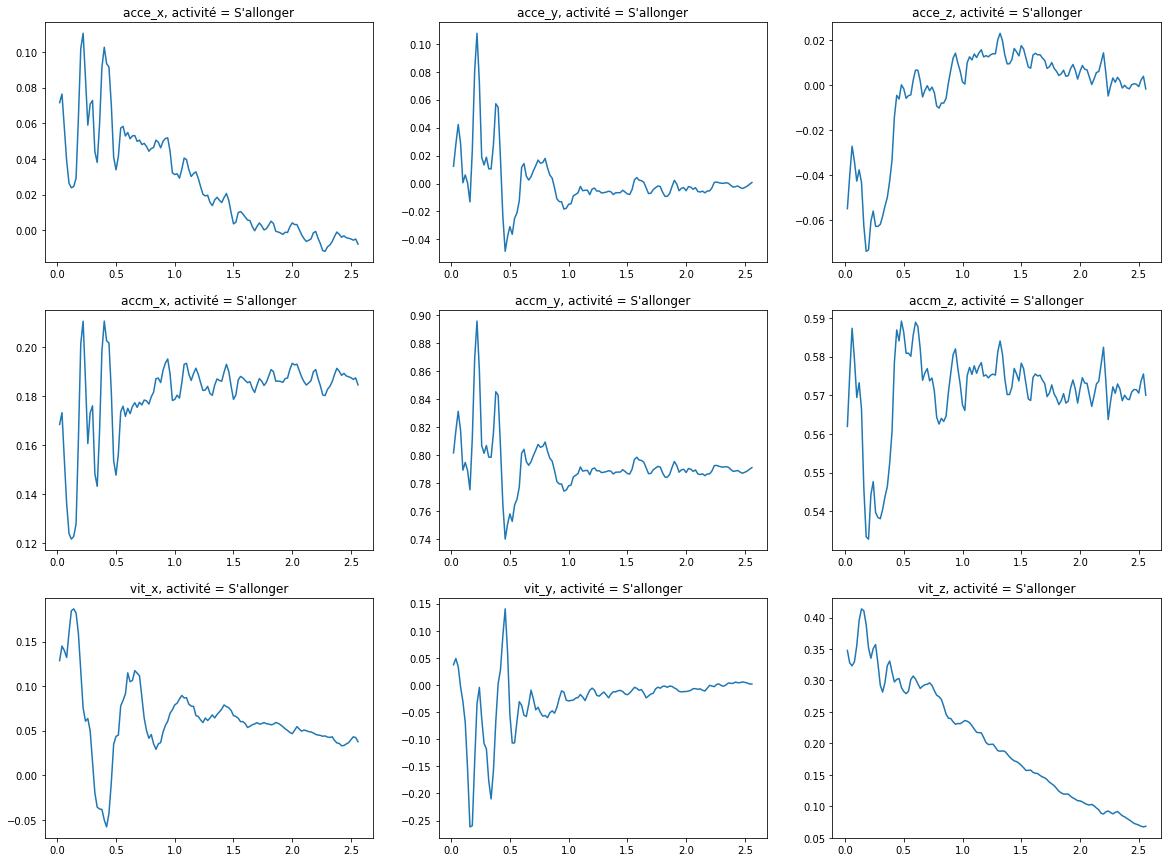

In [ ]:
# Activité d'une personne allonger
plot_activity(6)

# Pre-processing 

**series**: 347x128x9

**D_matrix:** 347x347, DTW metric applied on series

**sequences**: 347x1152

In [ ]:
# Définir un tableau contenant l'ensemble des séries en concaténant les fichies(347, 128, 9)
series = []
for observation in range(347):
  serie = []
  for variable in range(128):
    t = [acce_x.values[observation, variable], acce_y.values[observation, variable], acce_z.values[observation, variable],
         accm_x.values[observation, variable], accm_y.values[observation, variable], accm_z.values[observation, variable],
         vit_x.values[observation, variable], vit_y.values[observation, variable], vit_z.values[observation, variable]]
    serie.append(t)
  series.append(serie)
series = np.array(series)

In [ ]:
# Calculer la matrice des distances DTW (Dynamic Time Wrapper)
# https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html
D_matrix = []
for s1 in range(347):
  distances = []
  for s2 in range(347):
    distances.append(dtw_ndim.distance_fast(series[s1], series[s2]))
  D_matrix.append(distances)
D_matrix = np.array(D_matrix)

In [ ]:
# Concaténation
sequences = []
for obs in range(347):
  t =list(acce_x.values[obs,:])+list(acce_y.values[obs, :])+list(acce_z.values[obs,:])+list(accm_x.values[obs,:])+list(accm_y.values[obs,:])+list(accm_z.values[obs,:])+list(vit_x.values[obs,:])+list(vit_y.values[obs, :])+list(vit_z.values[obs,:])
  sequences.append(t)
sequences = np.array(sequences)
sequences.shape

(347, 1152)

# Méthodes directes

Les méthodes directes consistent à appliquer une méthode de classification directement sur les séries sans transformation au préalable.

## Kmeans 

Dans cette partie, on utilise TimeSeriesKMeans du module tslearn pour pouvoir modifier la distance ( euclidean, dtw).<br>

La classification est directement appliquée sur la matrice series qui contient l'ensemble des séries et pas les distances.

### Euclidean

**Interprétation des classes**

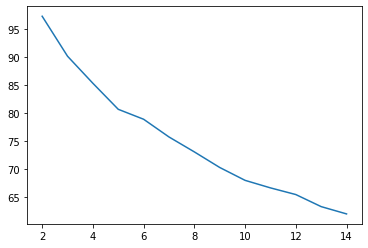

In [ ]:
# eulidean distance on series matrix
inertia_ = []
for nb_clusters_ in range(2,15):
  kmeans_res = TimeSeriesKMeans(n_clusters=nb_clusters_, metric="euclidean", max_iter=50,n_init=10,random_state=0).fit(series)
  inertia_.append(kmeans_res.inertia_)
plt.plot(range(2,15),inertia_)

In [ ]:
# La coude permet de détecter 05 classes
kmeans_res = TimeSeriesKMeans(n_clusters=5, metric="euclidean", max_iter=50,n_init=10,random_state=0).fit(series)


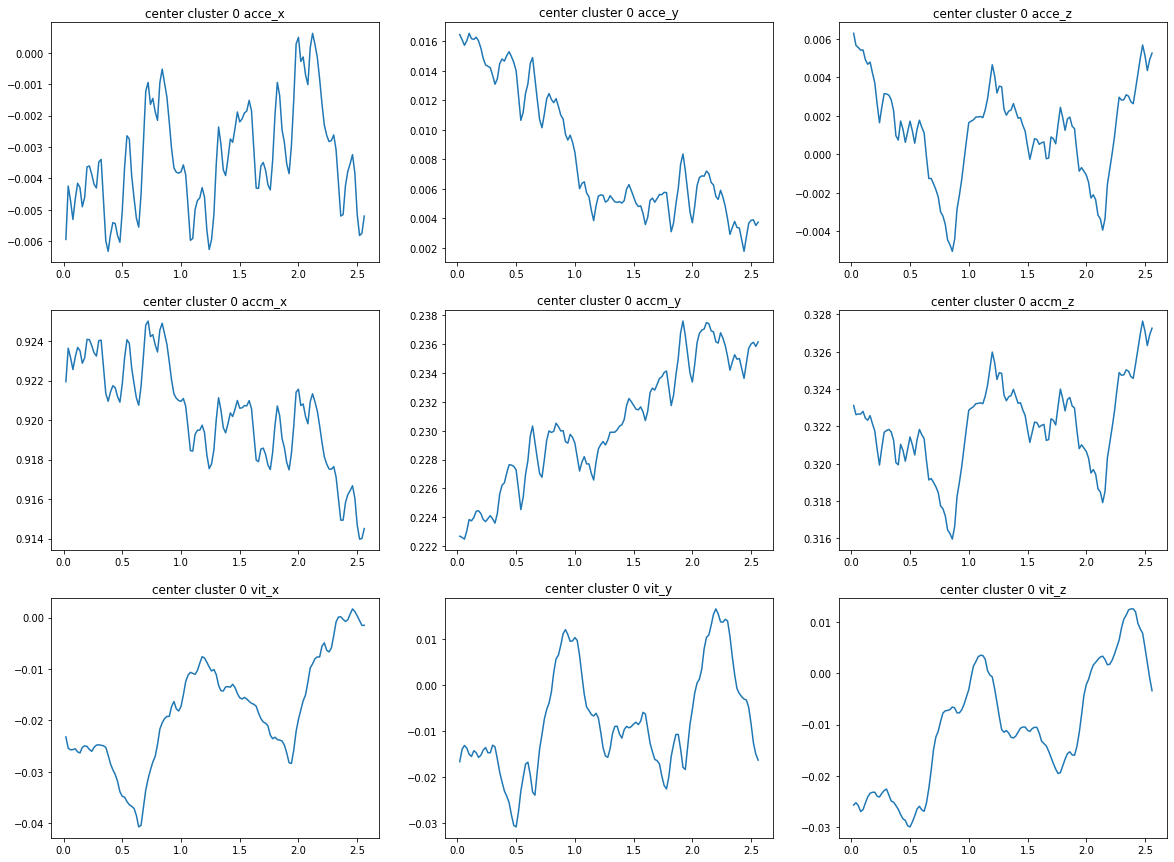

In [ ]:
plot_centers(model = kmeans_re, num_cluster_center=1)

In [ ]:
# validation sur 6 clusters
kmeans_res = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=50,n_init=10,random_state=0).fit(series)
scores(labels.values.flatten(), kmeans_res.labels_+1)

NMI:  0.43452537725822604
ARI:  0.19833384783574148


### DTW

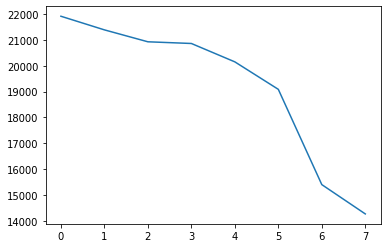

In [ ]:
# dtw distance
inertia_ = []
for nb_clusters_ in range(2,10):
  kmeans_res = TimeSeriesKMeans(n_clusters=nb_clusters_, metric="softdtw", max_iter=5,n_init=1,random_state=0).fit(series)
  inertia_.append(kmeans_res.inertia_)
inertia_.sort(reverse=True)
plt.plot(inertia_)

In [ ]:
kmeans_res = TimeSeriesKMeans(n_clusters=6, metric="softdtw", max_iter=10,n_init=1,random_state=0).fit(series)

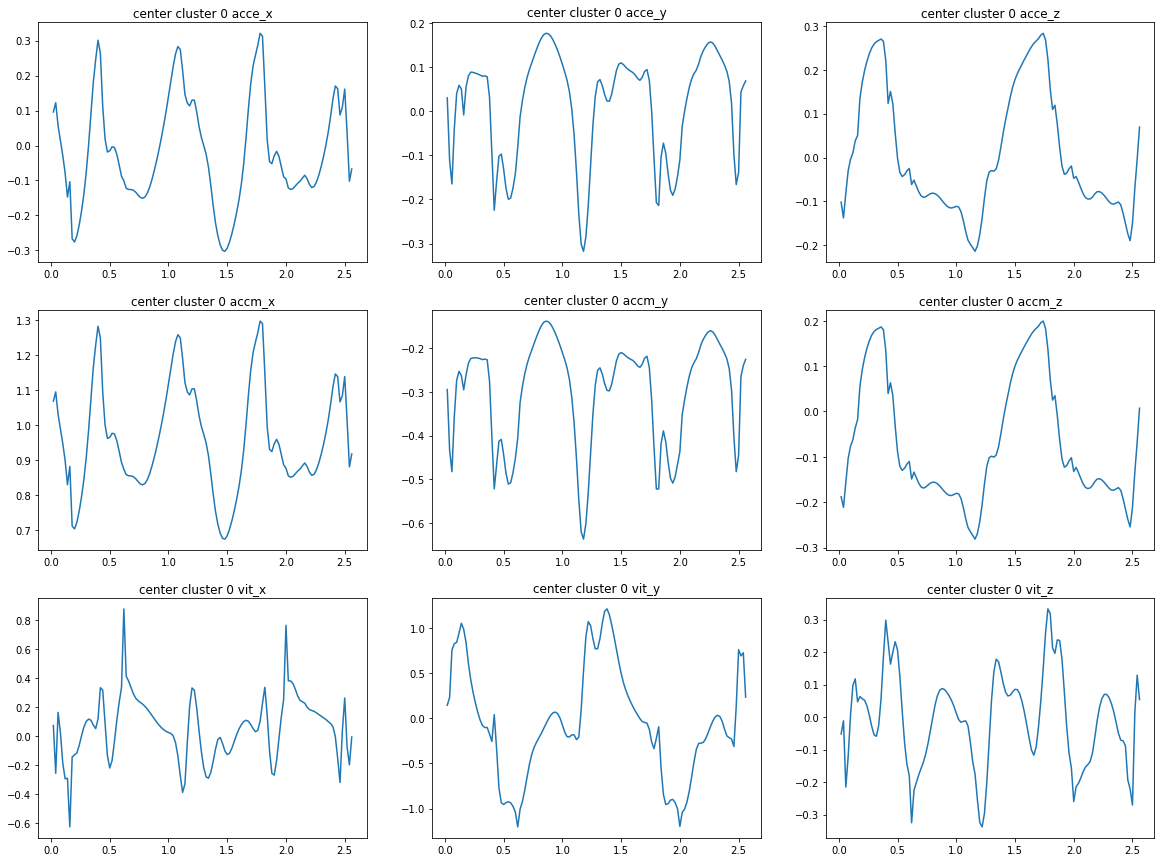

In [ ]:
# visualier les classes à travers les centres
plot_centers(kmeans_res, 0)

In [ ]:
# validation cluseters avec 6 clusters
scores(labels.values.flatten(), kmeans_res.labels_+1)

NMI:  0.6425913242140517
ARI:  0.4750407883953072


## CAH

CAH avec matrice de distance

In [ ]:
import scipy.spatial.distance as ssd
distArray = ssd.squareform(D_matrix)

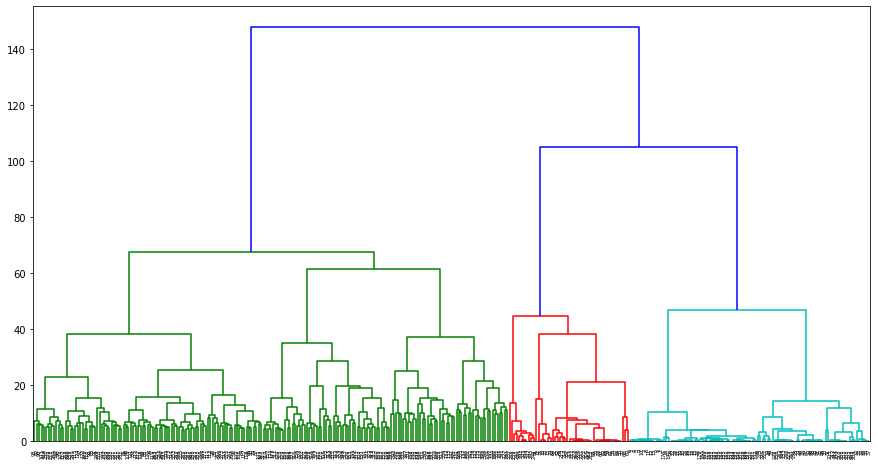

In [ ]:
# Rechercher une bonne partition
plt.figure(figsize=(15,8))
cah_ward = hierarchy.linkage(distArray, method="ward")
d = hierarchy.dendrogram(cah_ward)

In [ ]:
# Appliquer la partition avec nombre de classe optimal proposé par l'algorithme
pred_labels_ = hierarchy.cut_tree(cah_ward, 6)

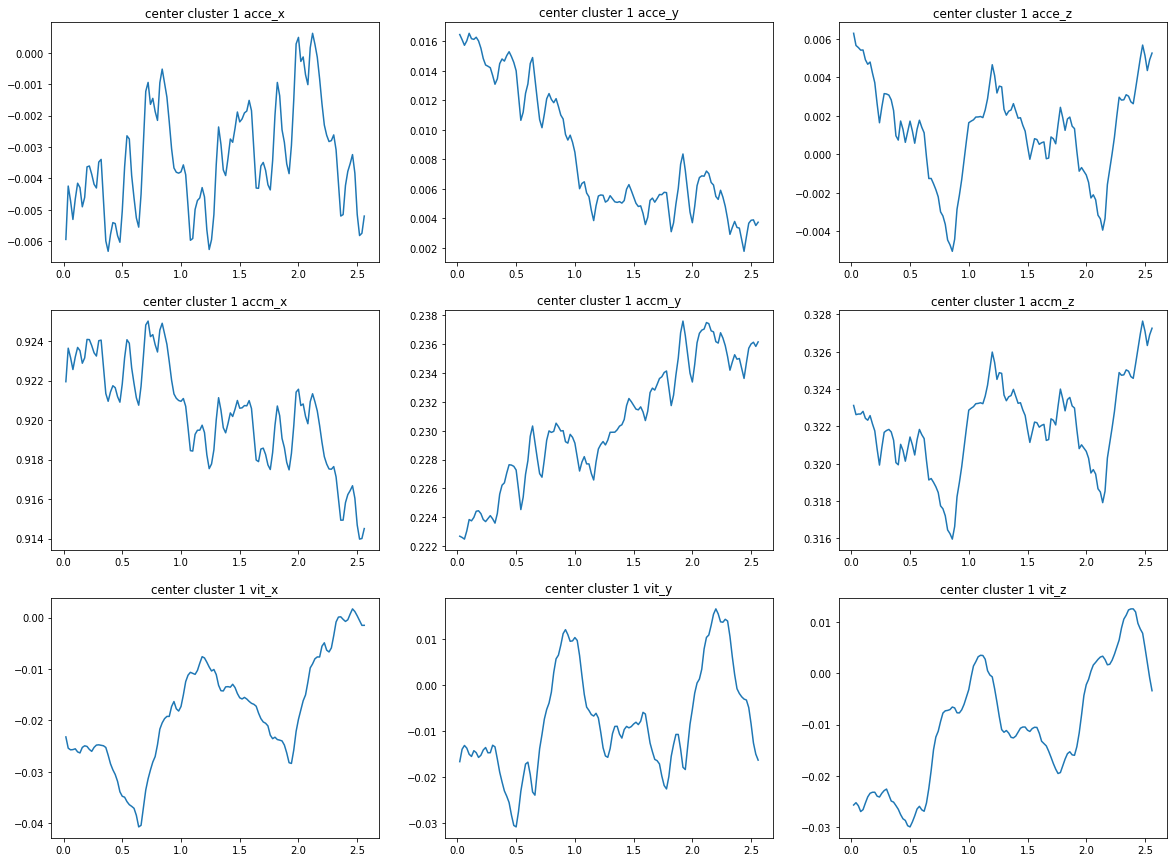

In [ ]:
# Interprétation des clusters
num_cluster = 1
index = [i for i in range(347) if pred_labels_[i]==num_cluster ]
mean_cluster = sequences[index, :].mean(axis=0)

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[0:128])
plt.title(f"center cluster {num_cluster} acce_x")
plt.subplot(3,3,2)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[128:256])
plt.title(f"center cluster {num_cluster} acce_y")
plt.subplot(3,3,3)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[256:384])
plt.title(f"center cluster {num_cluster} acce_z")
plt.subplot(3,3,4)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[384:512])
plt.title(f"center cluster {num_cluster} accm_x")
plt.subplot(3,3,5)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[512:640])
plt.title(f"center cluster {num_cluster} accm_y")
plt.subplot(3,3,6)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[640:768])
plt.title(f"center cluster {num_cluster} accm_z")
plt.subplot(3,3,7)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[768:896])
plt.title(f"center cluster {num_cluster} vit_x")
plt.subplot(3,3,8)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[896:1024])
plt.title(f"center cluster {num_cluster} vit_y")
plt.subplot(3,3,9)
plt.plot(np.linspace(0.02,2.56,128), mean_cluster[1024:1152])
plt.title(f"center cluster {num_cluster} vit_z")
plt.show()

In [ ]:
# validation de la partition avec les vrais labels
scores(labels.values.flatten(), pred_labels_.flatten()+1)

NMI:  1.0
ARI:  1.0


## K-medoids

La classe descendre les escaliers n'est pas capturée.

In [ ]:
# Critère à minimiser: l'inertia intra
# Recherche et application de la meilleure partition pour 6 clusters ???
initial_medoids = kmeans_plusplus_initializer(D_matrix, 6).initialize(return_index=True)
kmedoids_res = kmedoids(D_matrix,initial_medoids, data_type='distance_matrix')
kmedoids_res.process()

In [ ]:
kmedoids_res.get_medoids()

[23, 58, 281, 48, 255, 151]

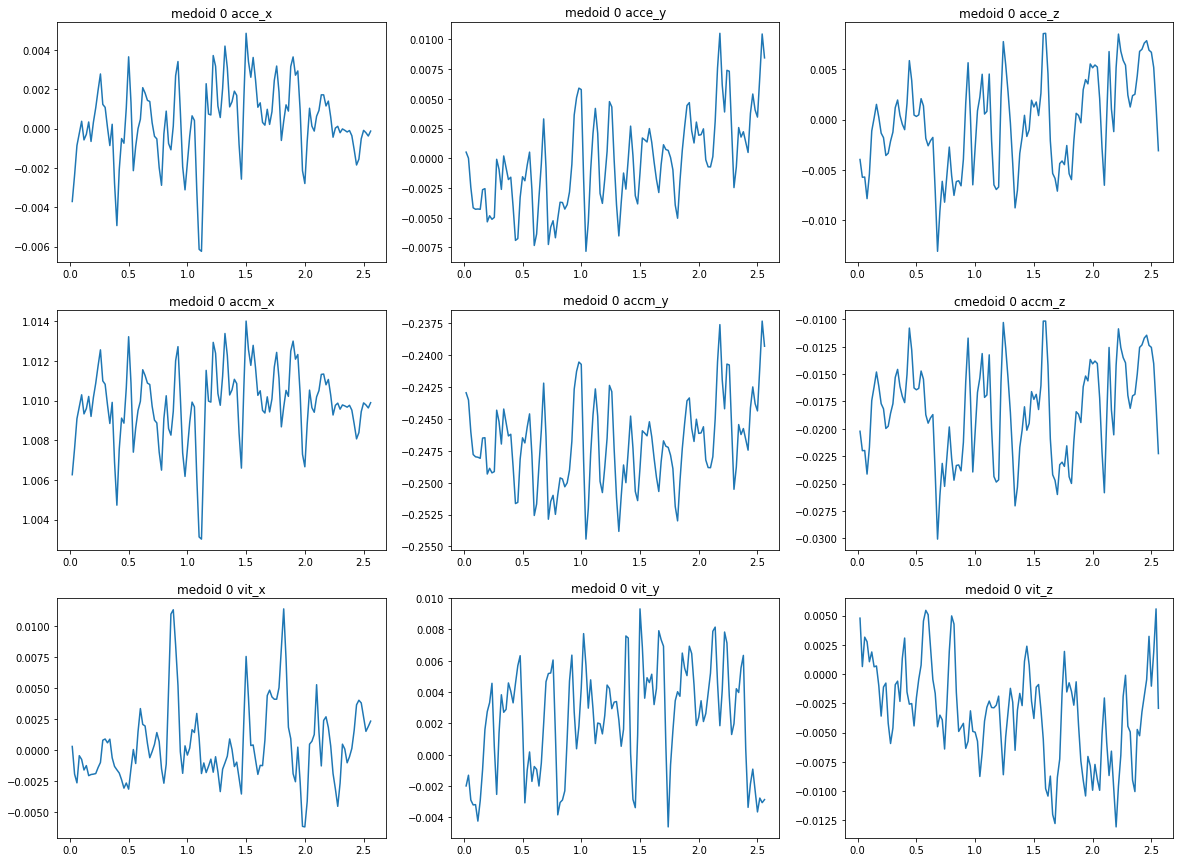

In [ ]:
# Interprètation des clusters sur les centres de classes.
num_cluster = 0
index = kmedoids_res.get_medoids()[num_cluster]
medoid = sequences[index, :]

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.plot(np.linspace(0.02,2.56,128), medoid[0:128])
plt.title(f"medoid {num_cluster} acce_x")
plt.subplot(3,3,2)
plt.plot(np.linspace(0.02,2.56,128), medoid[128:256])
plt.title(f"medoid {num_cluster} acce_y")
plt.subplot(3,3,3)
plt.plot(np.linspace(0.02,2.56,128), medoid[256:384])
plt.title(f"medoid {num_cluster} acce_z")
plt.subplot(3,3,4)
plt.plot(np.linspace(0.02,2.56,128), medoid[384:512])
plt.title(f"medoid {num_cluster} accm_x")
plt.subplot(3,3,5)
plt.plot(np.linspace(0.02,2.56,128), medoid[512:640])
plt.title(f"medoid {num_cluster} accm_y")
plt.subplot(3,3,6)
plt.plot(np.linspace(0.02,2.56,128), medoid[640:768])
plt.title(f"cmedoid {num_cluster} accm_z")
plt.subplot(3,3,7)
plt.plot(np.linspace(0.02,2.56,128), medoid[768:896])
plt.title(f"medoid {num_cluster} vit_x")
plt.subplot(3,3,8)
plt.plot(np.linspace(0.02,2.56,128), medoid[896:1024])
plt.title(f"medoid {num_cluster} vit_y")
plt.subplot(3,3,9)
plt.plot(np.linspace(0.02,2.56,128), medoid[1024:1152])
plt.title(f"medoid {num_cluster} vit_z")
plt.show()

In [ ]:
# Validation de la partition sur les vrais labels
pred_labels_ = [0]*347
for i, classe in enumerate(kmedoids_res.get_clusters()):
  for j in classe:
    pred_labels_[j] = i
scores(labels.values.flatten(),np.array(pred_labels_)+1)

NMI:  0.8051204311830261
ARI:  0.6810706301916359


# Extraction de caractéristique

## SAX

In [ ]:
sax = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=2,  scale=True)
series_sax = sax.fit_transform(series)
series_sax = np.array(series_sax, dtype=np.float)

In [ ]:
sequences_sax = []
for obs in range(347):
  seq = list(series_sax[obs].flatten())
  sequences_sax.append(seq)
sequences_sax = np.array(sequences_sax)

In [ ]:
D_matrix_sax = []
for s1 in range(347):
  distances = []
  for s2 in range(347):
    distances.append(dtw_ndim.distance_fast(series_sax[s1], series_sax[s2]))
  D_matrix_sax.append(distances)
D_matrix_sax = np.array(D_matrix_sax)

### KMeans

#### Euclidean

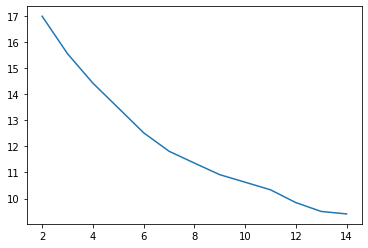

In [ ]:
# eulidean distance on series matrix
inertia_ = []
for nb_clusters_ in range(2,15):
  kmeans_res = TimeSeriesKMeans(n_clusters=nb_clusters_, metric="euclidean", max_iter=50,n_init=10,random_state=0).fit(series_sax)
  inertia_.append(kmeans_res.inertia_)
plt.plot(range(2,15),inertia_)

In [ ]:
# La coude permet de détecter 06 classes
kmeans_res = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=50,n_init=10,random_state=0).fit(series_sax)

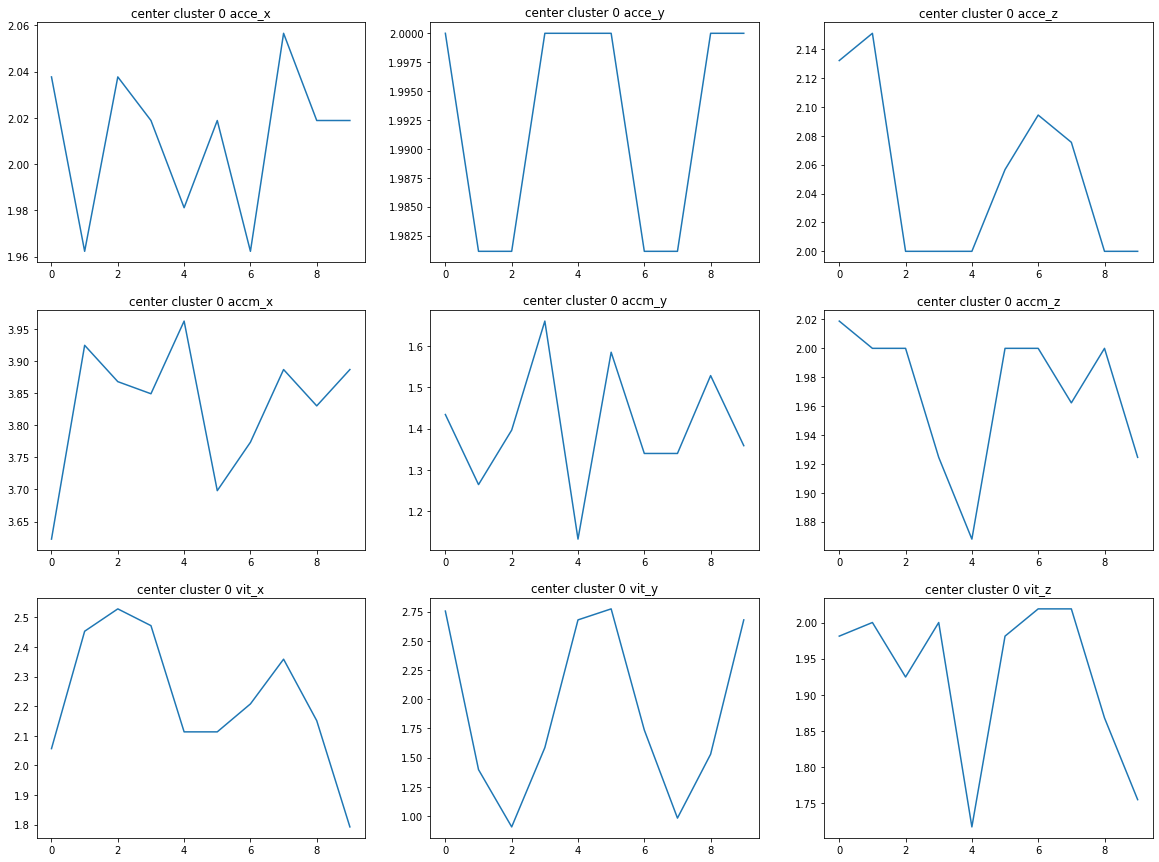

In [ ]:
# visualisation des centres des classes
plot_centers(kmeans_res, 0)

In [ ]:
# validation des clusters
scores(labels.values.flatten(), kmeans_res.labels_+1)

NMI:  0.5101643835592926
ARI:  0.3450590891908071


#### DTW

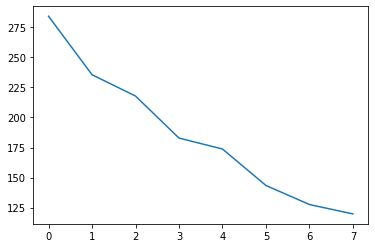

In [ ]:
# dtw distance
inertia_ = []
for nb_clusters_ in range(2,10):
  kmeans_res = TimeSeriesKMeans(n_clusters=nb_clusters_, metric="softdtw", max_iter=5,n_init=1,random_state=0).fit(series_sax)
  inertia_.append(kmeans_res.inertia_)
inertia_.sort(reverse=True)
plt.plot(inertia_)

In [ ]:
# 06 clusters
kmeans_res = TimeSeriesKMeans(n_clusters=6, metric="softdtw", max_iter=10,n_init=3,random_state=0).fit(series_sax)

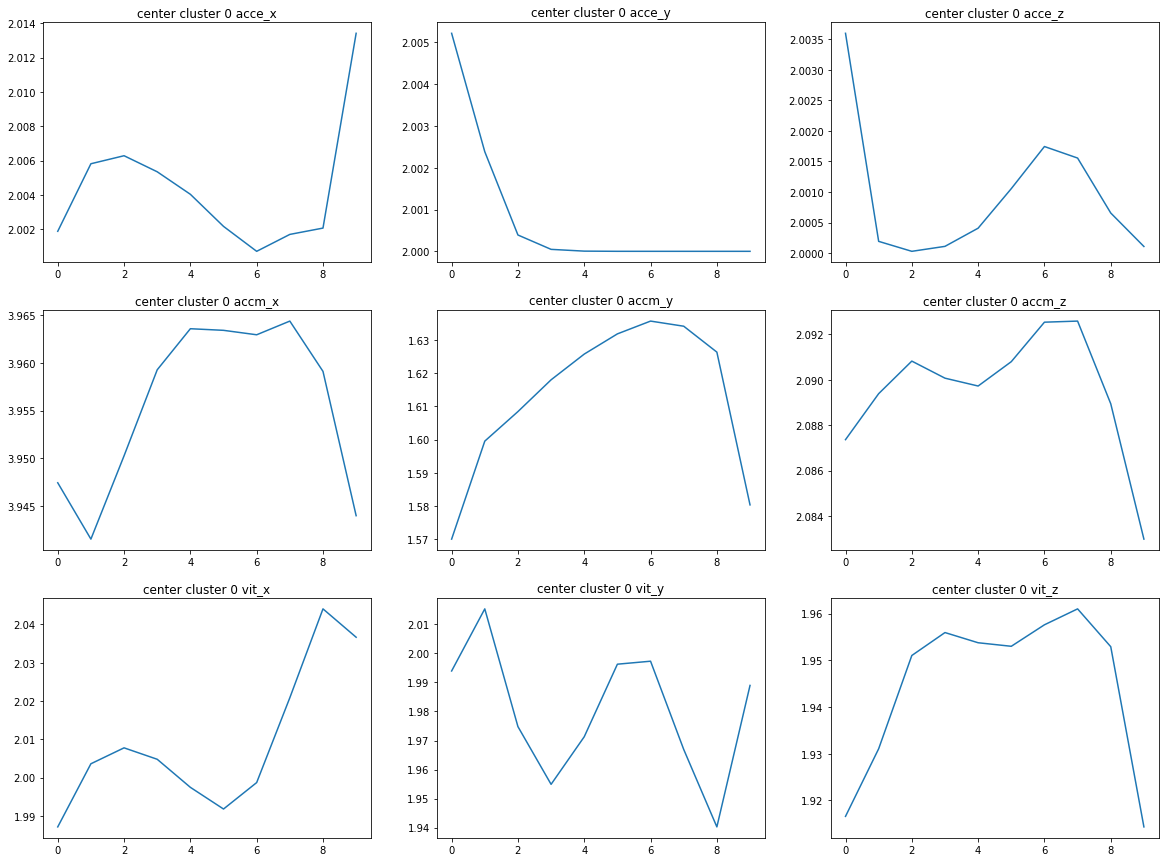

In [ ]:
# visualier les classes à travers les centres
plot_centers(kmeans_res, 0)

In [ ]:
# validation cluseters avec 6 clusters
scores(labels.values.flatten(), kmeans_res.labels_+1)

NMI:  0.6316067099546175
ARI:  0.4883938914112194


### CAH

CAH avec matrice de distance

In [ ]:
import scipy.spatial.distance as ssd
distArray = ssd.squareform(D_matrix_sax)

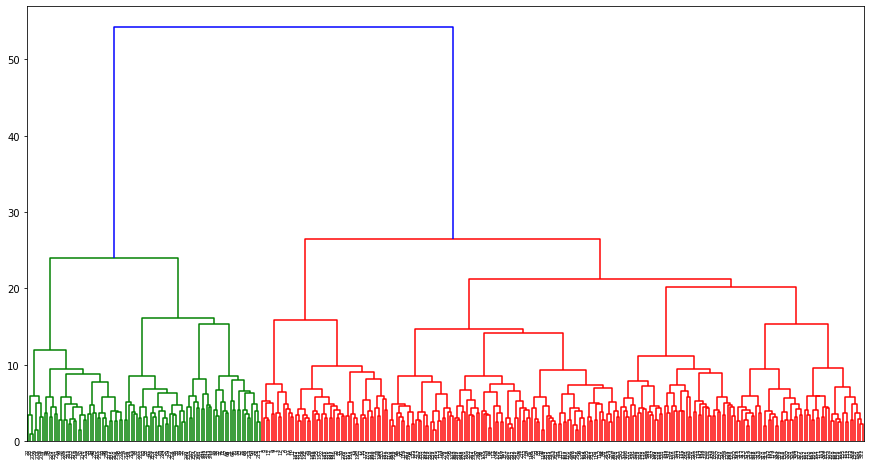

In [ ]:
# Rechercher une bonne partition
plt.figure(figsize=(15,8))
cah_ward = hierarchy.linkage(distArray, method="ward")
d = hierarchy.dendrogram(cah_ward)

In [ ]:
# Appliquer la partition avec nombre de classe optimal proposé par l'algorithme
pred_labels_ = hierarchy.cut_tree(cah_ward, 6)

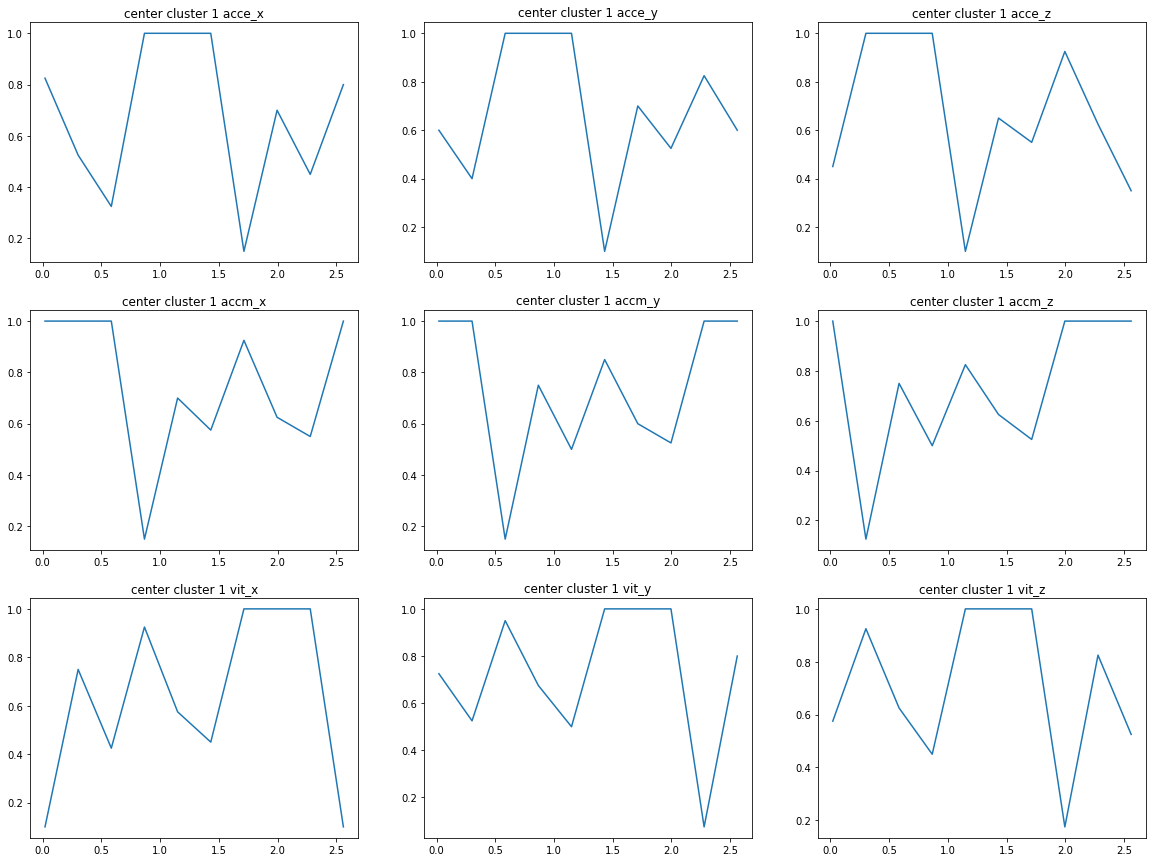

In [ ]:
# Interprétation des clusters en prenant la moyenne
num_cluster = 1
index = [i for i in range(347) if pred_labels_[i]==num_cluster ]
mean_cluster = sequences_sax[index, :].mean(axis=0)

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[0:10])
plt.title(f"center cluster {num_cluster} acce_x")
plt.subplot(3,3,2)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[10:20])
plt.title(f"center cluster {num_cluster} acce_y")
plt.subplot(3,3,3)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[20:30])
plt.title(f"center cluster {num_cluster} acce_z")
plt.subplot(3,3,4)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[30:40])
plt.title(f"center cluster {num_cluster} accm_x")
plt.subplot(3,3,5)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[40:50])
plt.title(f"center cluster {num_cluster} accm_y")
plt.subplot(3,3,6)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[50:60])
plt.title(f"center cluster {num_cluster} accm_z")
plt.subplot(3,3,7)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[60:70])
plt.title(f"center cluster {num_cluster} vit_x")
plt.subplot(3,3,8)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[70:80])
plt.title(f"center cluster {num_cluster} vit_y")
plt.subplot(3,3,9)
plt.plot(np.linspace(0.02,2.56,10), mean_cluster[80:90])
plt.title(f"center cluster {num_cluster} vit_z")
plt.show()

In [ ]:
# validation de la partition avec les vrais labels
scores(labels.values.flatten(), pred_labels_.flatten()+1)

NMI:  0.9495216798616911
ARI:  0.9503531832688478


### K-modoids

In [ ]:
# Critère à minimiser: l'inertia intra
# Recherche et application de la meilleure partition pour 6 clusters ???
initial_medoids = kmeans_plusplus_initializer(D_matrix_sax, 6).initialize(return_index=True)
kmedoids_res = kmedoids(D_matrix_sax,initial_medoids, data_type='distance_matrix')
kmedoids_res.process()

In [ ]:
# k-medoids
kmedoids_res.get_medoids()

[280, 235, 61, 286, 25, 338]

In [ ]:
for i,j in enumerate(kmedoids_res.get_medoids()):
  print(f"cluster {i} : {classes[labels.values.flatten()[j]]}")

cluster 0 : Marcher
cluster 1 : S'asseoir
cluster 2 : S'allonger
cluster 3 : Marcher
cluster 4 : Se lever
cluster 5 : Descendre les escaliers


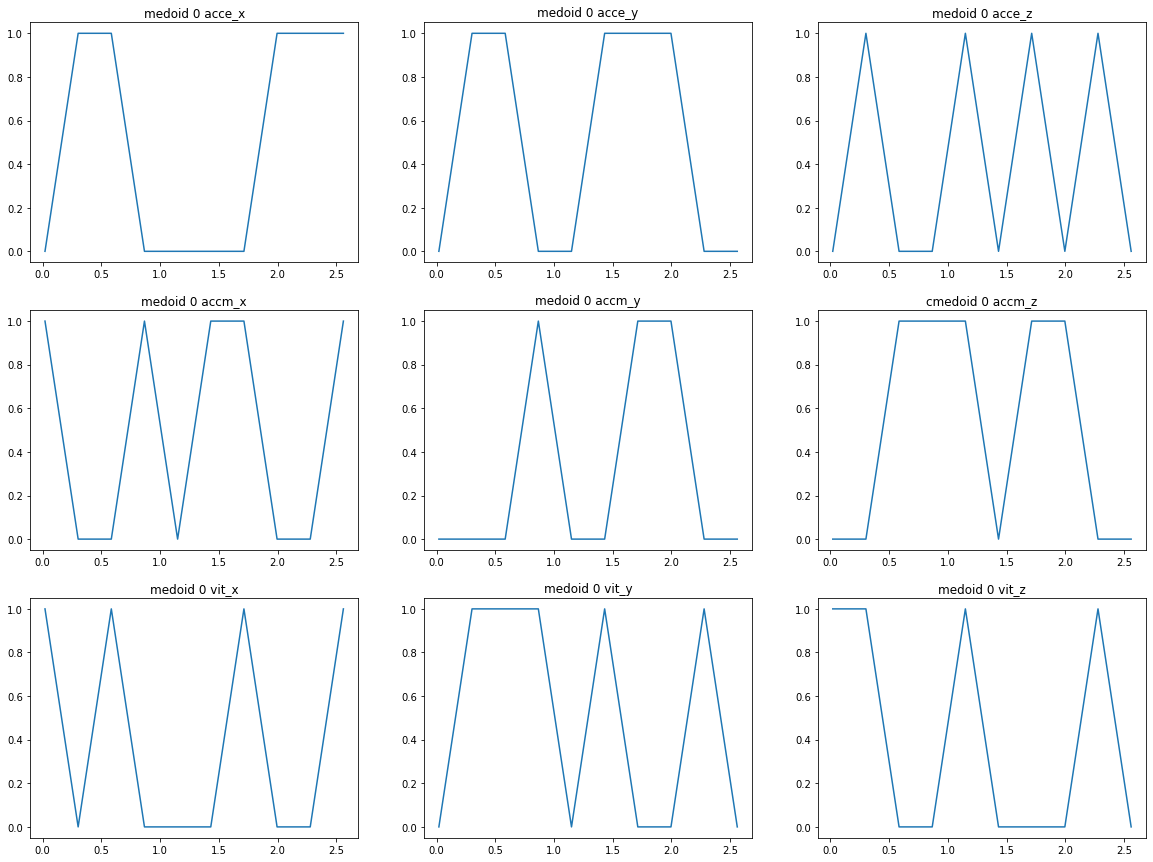

In [ ]:
# Interprètation des clusters sur les centres de classes. (medoid)
num_cluster = 0
index = kmedoids_res.get_medoids()[num_cluster]
medoid = sequences_sax[index, :]

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.plot(np.linspace(0.02,2.56,10), medoid[0:10])
plt.title(f"medoid {num_cluster} acce_x")
plt.subplot(3,3,2)
plt.plot(np.linspace(0.02,2.56,10), medoid[10:20])
plt.title(f"medoid {num_cluster} acce_y")
plt.subplot(3,3,3)
plt.plot(np.linspace(0.02,2.56,10), medoid[20:30])
plt.title(f"medoid {num_cluster} acce_z")
plt.subplot(3,3,4)
plt.plot(np.linspace(0.02,2.56,10), medoid[30:40])
plt.title(f"medoid {num_cluster} accm_x")
plt.subplot(3,3,5)
plt.plot(np.linspace(0.02,2.56,10), medoid[40:50])
plt.title(f"medoid {num_cluster} accm_y")
plt.subplot(3,3,6)
plt.plot(np.linspace(0.02,2.56,10), medoid[50:60])
plt.title(f"cmedoid {num_cluster} accm_z")
plt.subplot(3,3,7)
plt.plot(np.linspace(0.02,2.56,10), medoid[60:70])
plt.title(f"medoid {num_cluster} vit_x")
plt.subplot(3,3,8)
plt.plot(np.linspace(0.02,2.56,10), medoid[70:80])
plt.title(f"medoid {num_cluster} vit_y")
plt.subplot(3,3,9)
plt.plot(np.linspace(0.02,2.56,10), medoid[80:90])
plt.title(f"medoid {num_cluster} vit_z")
plt.show()

In [ ]:
# Validation de la partition sur les vrais labels
pred_labels_ = [0]*347
for i, classe in enumerate(kmedoids_res.get_clusters()):
  for j in classe:
    pred_labels_[j] = i
scores(labels.values.flatten(),np.array(pred_labels_)+1)

NMI:  0.6395858665472282
ARI:  0.48548169797575647


# Méthode probabiliste - ARIMA

In [ ]:
series_arima = np.zeros((347,128,9))
for obs in range(347):
  for var in range(9):
    serie = series[obs][:,var]
    stepwise_fit = auto_arima(serie, trace=True, suppress_warnings=True)
    model = ARIMA(serie, order=stepwise_fit.get_params()['order'])
    m = model.fit()
    new_values = list(m.predict())
    series_arima[obs][:,var] = new_values

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1167.365, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.211, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1216.781, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1220.672, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1215.206, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1217.145, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1208.634, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1222.610, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1219.058, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1248.454, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1210.355, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1209.207, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-1212.952, Time=0.22 sec

Best model:  ARIMA(0,1,2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1150.187, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1184.244, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1193.495, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1213.154, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1186.151, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1223.610, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1216.757, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1162.102, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1231.199, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1178.244, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1246.139, Time=0.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1218.315, Time=0.79 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1182.577, Time=0.53 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1176.243, Time=0.54 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1199.847, Time=0.37

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1124.986, Time=0.64 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1069.824, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1076.590, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1086.693, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1125.000, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1120.350, Time=0.40 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1108.062, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1070.581, Time=0.33 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1063.822, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1097.800, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1105.542, Time=0.47 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1120.309, Time=0.71 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 3.695 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1250.958, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1252.010, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1265.491, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1266.473, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.144, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1263.877, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1263.398, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 1.729 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1271.891, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1097.831, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1208.321, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1205

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1060.555, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1038.039, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1054.319, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1069.307, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1040.037, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1068.801, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1079.997, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1054.033, Time=0.91 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1081.725, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1056.904, Time=0.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1060.682, Time=1.02 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1058.331, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1064.514, Time=0.15 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 6.151 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1011.585, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-936.512, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-979.500, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-985.358, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-937.551, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-969.168, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1044.395, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-986.723, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-995.560, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-997.401, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1009.857, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1050.755, Time=0.89 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1043.453, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1012.558, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[0] int

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1080.749, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1056.480, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1054.554, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1054.569, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1058.144, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1055.116, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1052.359, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1034.151, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1053.189, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1052.683, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1077.414, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1050.014, Time=0.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1040.919, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1087.254, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1202.549, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1110.682, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1127.648, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1112.644, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1206.768, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1106.683, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1100.003, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1160.964, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1203.383, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1208.770, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1168.909, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1150.011, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1104.282, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1116.902, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1106.081, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1169.849, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1100.283, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1159.010, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1173.686, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1098.283, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1149.006, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1162.434, Time=0.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1156.136, Time=0.79 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1122.861, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1184.015, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-887.699, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1102.437, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-820.240, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1173.216, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1163.616, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1215.400, Time=0.60 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1164.803, Time=0.19 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1216.926, Time=0.71 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1185.125, Time=0.31 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1254.133, Time=0.82 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1207.159, Time=0.38 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-1188.936, Time=0.75 sec
 ARIMA(4,0,3)(0,0,0)[0] int

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1305.004, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1127.835, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1196.422, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1127.091, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1282.695, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1274.020, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1299.442, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1280.451, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1279.146, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1285.486, Time=0.53 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1283.617, Time=0.08 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1198.421, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1108.627, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1132.681, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.480, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1110.543, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1202.570, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1104.628, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1102.629, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1159.384, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1198.599, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1204.098, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1106.544, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1153.007, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1075.927, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1084.102, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1077.895, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1155.979, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1132.894, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1141.811, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1116.374, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1138.351, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1157.678, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1151.375, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1205.819, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1108.891, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1132.791, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.419, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1110.802, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1203.793, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1159.681, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1135.509, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1180.761, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1170.447, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1105.962, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1163.215, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1193.584, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1201.286, Time=0.18 sec

Best model:  ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-969.688, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1039.422, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1089.489, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-971.071, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1080.897, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1083.557, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1091.219, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1086.970, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1079.247, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1041.269, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1085.449, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.942 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1137.212, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-845.759, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1057.656, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-819.686, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1127.599, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1153.208, Time=0.57 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1122.122, Time=0.24 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1164.822, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1143.515, Time=0.46 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1146.946, Time=0.77 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1138.445, Time=0.64 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1134.088, Time=0.60 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1349.311, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1148.964, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1226.801, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1149.042, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1327.675, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1334.433, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1342.402, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1276.676, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1309.321, Time=0.37 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1331.547, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1337.775, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1361.282, Time=0.55 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1346.478, Time=0.78 sec
 ARIMA(3,0,4)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1257.509, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1174.280, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1195.237, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1220.342, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1176.279, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1211.720, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1222.649, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1162.442, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1230.537, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1163.394, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1210.915, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1248.226, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1168.281, Time=0.07 sec

Best model:  ARIMA(2,1,2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1184.968, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1118.302, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1128.059, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1120.126, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1182.526, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1142.188, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1121.518, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1175.405, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1167.668, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1141.483, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1154.406, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1199.104, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1196.337, Time=0.17 sec
 ARIMA(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1150.690, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-833.995, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1026.404, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-654.291, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1100.525, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1087.127, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1146.810, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1076.283, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1135.671, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1108.327, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1122.698, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] in

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1138.406, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1081.831, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1095.583, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1083.729, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1155.287, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1138.689, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1131.395, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1163.681, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1127.680, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-1165.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1373.817, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1221.723, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1302.886, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1219.724, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1222.529, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1377.914, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1361.804, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1374.386, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1285.078, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1215.726, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1364.628, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1325.652, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1379.532, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1363.022, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.503, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1105.586, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1108.250, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1107.320, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1181.883, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1161.058, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1167.833, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1135.009, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1179.836, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1182.527, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1103.321, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1369.681, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1230.350, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1304.297, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1332.004, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.382, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1366.629, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1349.069, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1368.402, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1319.860, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1351.364, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1379.266, Time=1.99 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1428.292, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1435.440, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1182.013, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1070.621, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1136.623, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-265.588, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1196.639, Time=0.49 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1159.597, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1203.664, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1202.085, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1163.199, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.207 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1099.857, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-102

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1155.697, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-874.787, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1080.060, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-876.728, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1119.928, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1170.631, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1170.382, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1096.970, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1178.987, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1122.572, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1150.148, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1170.410, Time=0.50 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1158.465, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0] int

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1336.807, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1190.651, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1269.174, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1188.652, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1192.502, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1338.447, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1327.185, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1323.762, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1313.459, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1329.547, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1340.283, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1329.173, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1324.576, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1191.541, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1269.294, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1287.826, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.363, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1325.150, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1304.898, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1260.505, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1185.541, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1300.351, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1266.167, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.327 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1114.106, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-868.358, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1060.110, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-864.182, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1139.643, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1183.597, Time=0.48 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1128.066, Time=0.43 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1198.689, Time=0.51 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1100.259, Time=0.40 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1169.762, Time=0.58 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=-11

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1142.542, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-802.968, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1084.203, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-792.993, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1171.073, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1137.037, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1158.511, Time=0.39 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1086.938, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1125.119, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1156.954, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1144.399, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.977 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1202.251, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1146.279, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1161.345, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1147.475, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1131.053, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1220.375, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1185.727, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1203.490, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1186.761, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1218.076, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1193.643, Time=0.19 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.623 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1169.910, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1064.033, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1076.518, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1065.878, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1168.560, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1116.987, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1165.068, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1162.413, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1171.349, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1171.883, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1135.994, Time=0.29 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1318.823, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1173.776, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1268.024, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.476, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1323.285, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1298.496, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1300.757, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1259.929, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1301.888, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1281.824, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.721 seconds
Performing stepwise search to

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1113.691, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1031.362, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1063.299, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1095.762, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1032.813, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1120.004, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1071.129, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1107.737, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1077.348, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1104.338, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1122.596, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1230.518, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1248.112, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1254.217, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1250.053, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1274.269, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1272.295, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1272.352, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1265.497, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1269.914, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1276.189, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1256.191, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1274.211, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1274.263, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1184.640, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1082.931, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1097.240, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1084.911, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1175.096, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1155.787, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1160.961, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1188.475, Time=0.94 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1134.238, Time=0.52 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1186.546, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1205.122, Time=0.61 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1173.200, Time=1.05 sec
 ARIMA(1,1,5)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1297.454, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1175.229, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1273.145, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.471, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1317.626, Time=1.80 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1282.504, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1304.229, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1265.573, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1328.413, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1331.834, Time=0.51 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1263.841, Time=0.23 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=-1329.461, Time=0.57 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=-1262.442, Time=0.27 sec
 ARIMA(0,0,4)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1172.539, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1112.372, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1120.979, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1143.101, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1114.096, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1194.225, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1108.373, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1158.898, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1175.167, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1157.250, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1103.981, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1195.256, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1110.097, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1186.359, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1083.249, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1097.429, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1123.292, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1085.092, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1179.838, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1151.503, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1175.872, Time=1.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1190.009, Time=0.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1197.999, Time=0.86 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1162.439, Time=0.64 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-1135.662, Time=0.27 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1140.958, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1099.080, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-784.024, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1027.173, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-773.422, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1123.238, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1123.734, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1080.550, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1076.414, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1095.469, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.868 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1106.731, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1038

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1262.607, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1276.807, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1282.690, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1294.321, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1278.804, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1296.293, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1308.013, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1310.078, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1307.995, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1306.362, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1312.073, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1284.690, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1309.994, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1310.010, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1155.991, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1102.048, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1109.304, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1103.555, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1088.256, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1186.123, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1150.232, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1133.422, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1180.518, Time=0.61 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1134.091, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1156.958, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1141.362, Time=0.10 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.647 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1342.087, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1208.877, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1296.414, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1305.335, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.462, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1352.849, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1319.915, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1329.726, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1290.889, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1225.033, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1309.286, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.245 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1236.255, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1070.842, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1181.130, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-300.944, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1238.101, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1263.681, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1260.440, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1207.698, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1183.032, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.149 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1044.487,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1158.300, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1058.949, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1100.039, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1060.415, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1157.716, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1105.899, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1092.947, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1115.008, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1138.192, Time=0.85 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
To

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1157.770, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-858.228, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1098.500, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-836.661, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1172.208, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-979.638, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1174.681, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1172.824, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1126.042, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1141.910, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.470 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1168.040, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1188.757, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-965.735, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1086.448, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-965.416, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1164.877, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1177.780, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1161.711, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1152.275, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1167.298, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1172.345, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1143.872, Time=0.43 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] in

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1265.976, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1115.840, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1199.509, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.622, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1263.134, Time=2.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1265.811, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1261.395, Time=2.81 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1234.011, Time=1.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1251.570, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1287.432, Time=0.67 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1188.998, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1225.700, Time=0.13 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1179.196, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-966.547, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1086.696, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-298.226, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1163.321, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1185.704, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1117.332, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1162.836, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1128.151, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1144.630, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.615 seconds
Performing stepwise search to

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1066.027, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-777.620, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-956.245, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-769.621, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1092.438, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1094.503, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1062.986, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1072.701, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1058.392, Time=0.55 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1062.153, Time=0.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-109

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1262.721, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1112.240, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1198.313, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1113.965, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1254.486, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1241.229, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1271.653, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1242.243, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1265.922, Time=0.54 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1247.089, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1245.345, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1254.364, Time=0.37 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1256.588, Time=1.08 sec
 ARIMA(3,0,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1163.312, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1048.219, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1066.443, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1050.202, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1147.507, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1156.614, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1155.494, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1127.705, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1154.387, Time=0.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1119.489, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1157.664, Time=0.27 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1131.355, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-958.417, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1057.104, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-950.398, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1144.575, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1121.896, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1096.101, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1149.064, Time=0.38 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1100.482, Time=0.07 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1145.602, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1112.683, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : A

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1127.768, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-955.204, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1056.509, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-293.956, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1125.413, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1130.391, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1142.763, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1094.746, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.164 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1048.355, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-931.329, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-992.157, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-933.314, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1041.497, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1047.144, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1044.432, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1031.875, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1044.760, Time=0.47 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1055.372, Time=0.61 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1058.862, Time=1.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AI

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1077.872, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-787.529, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-975.649, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-783.257, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1094.478, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1081.144, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1110.069, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1054.686, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1096.443, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1072.001, Time=0.48 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1099.121, Time=0.53 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1095.920, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0]           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1067.789, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-778.270, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-958.577, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-780.130, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1062.585, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1083.620, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1020.619, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1073.597, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1030.827, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1080.151, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1044.114, Time=0.06 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.722 seconds
Performing stepwise sear

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1363.767, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1241.595, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1348.111, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1343.036, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.544, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1386.298, Time=0.17 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1348.800, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1376.203, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1392.541, Time=0.50 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1370.913, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1336.911, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 2.738 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1202.361, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1201.923, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1206.388, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1203.641, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1239.009, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1243.226, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1259.446, Time=0.50 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1264.067, Time=0.24 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1283.393, Time=0.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1270.120, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1194.621, Time=0.81 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1199.317, Time=0.91 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-1270.126, Time=0.18 sec

Best model:  ARIMA(5,1,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1190.721, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-912.304, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1139.474, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-882.135, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1188.374, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1219.389, Time=0.67 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1182.194, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1191.568, Time=0.65 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1182.449, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1192.422, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1191.921, Time=0.41 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0]             : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1185.589, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1117.672, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1131.421, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1156.210, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1119.667, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1203.447, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1167.913, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1171.969, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1193.619, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1157.921, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1196.238, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1209.846, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1253.854, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1032.913, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1173.763, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1000.990, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1246.574, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1232.947, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1192.741, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1217.109, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1248.166, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1156.746, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1234.512, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1222.881, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1243.742, Time=0.38 sec

Best model:  ARIMA(2,0,2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1454.500, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1266.350, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1376.905, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1264.349, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1266.886, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1367.355, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1445.157, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1406.521, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1447.643, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1444.517, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1464.675, Time=0.15 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1260.349, Time=0.31 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1357.526, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1421.036, Time=0.15 sec
 ARIMA(0,0,4)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1440.489, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1277.046, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1378.570, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.614, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1453.947, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1411.791, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1424.529, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1464.014, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1271.045, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1356.976, Time=0.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1366.148, Time=0.24 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1269.044, Time=0.22 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1387.886, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1197.445, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1201.761, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1215.130, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1199.427, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1221.423, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1234.305, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1233.047, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1232.585, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1271.033, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1246.721, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1193.396, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1238.121, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1220.074, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1114.738, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1126.131, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1116.650, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1203.444, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1222.533, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1174.455, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1174.193, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1185.827, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1173.638, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1214.783, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1177.831, Time=0.24 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 4.114 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1399.404, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1268.405, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1329.833, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1369.755, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=370.556, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1392.886, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1375.159, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1397.328, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1367.162, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1379.933, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1407.481, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1446.644, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1376.172, Time=0.14 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1360.777, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1221.876, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1238.466, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1247.028, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1262.467, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1240.159, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1306.777, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1309.719, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1225.353, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1232.465, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1267.985, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1218.066, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1311.199, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1236.159, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1271.119, Time=0.09 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1237.323, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1152.526, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1161.284, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1184.988, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1154.502, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1241.404, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1207.918, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1186.770, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1151.537, Time=0.67 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1146.526, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1202.153, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1165.596, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1243.171, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1209.667, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1239.528, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1140.437, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1167.296, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1225.709, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1134.620, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1227.125, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1235.069, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1181.723, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1243.551, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1197.950, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1198.472, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.017 seconds
Performing stepwise s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1245.383, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1144.017, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1168.404, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1145.998, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1231.307, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1165.285, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1182.370, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1226.663, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1236.670, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1221.869, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1222.195, Time=0.95 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1247.371, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1005.895, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-619.539, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-905.809, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-553.963, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1036.017, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1018.826, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1011.421, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-919.932, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1022.942, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-991.464, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-997.224, Time=0.15 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.145 seconds
Performing stepwise search 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1091.744, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1017.354, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1039.077, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1067.296, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1007.880, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1097.766, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1081.038, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1105.438, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1050.956, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1105.708, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1053.562, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1335.594, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1173.203, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1269.617, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1172.799, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1341.172, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1333.736, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1341.680, Time=0.33 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1165.207, Time=0.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1259.518, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.560 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1347.621, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-942.163, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1289.108, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-914.194, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1356.887, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1315.763, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1282.031, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1213.344, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1349.137, Time=0.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1279.085, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1355.189, Time=0.36 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.705 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1183.283, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1137.435, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1141.267, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1138.822, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1192.458, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1183.335, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1200.061, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1192.626, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1175.095, Time=0.41 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1197.168, Time=0.73 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1129.435, Time=0.31 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1189.028, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1333.269, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1187.457, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1272.462, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1288.359, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.624, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1335.289, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1322.549, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1310.322, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1266.219, Time=0.38 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1181.458, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1186.848, Time=1.76 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1280.288, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 4.254 seconds
Performing stepwi

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1200.622, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1138.587, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1142.041, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1140.367, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1217.030, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1190.446, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1170.465, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1182.200, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1202.566, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1179.739, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1216.388, Time=0.45 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 5.022 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1163.300, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1102.994, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1119.800, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1104.984, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1147.909, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1164.648, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1183.268, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1130.415, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1183.930, Time=0.74 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1138.781, Time=0.15 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1213.128, Time=0.69 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1165.220, Time=0.28 sec
 ARIMA(5,1,2)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1336.518, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1181.259, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1266.789, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1291.273, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.743, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1336.079, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1222.100, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1334.320, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1296.534, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1318.832, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1260.690, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1319.439, Time=0.29 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1298.373, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1223.313, Time=0.11 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1294.416, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-996.714, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1250.318, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.731, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1291.599, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1296.111, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1267.179, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1261.321, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1296.697, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1263.905, Time=0.15 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1289.061, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1250.938, Time=0.78 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1265.253, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0] interc

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1169.434, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1127.020, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1143.005, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1128.776, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1185.117, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1123.021, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1121.021, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1164.080, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1164.984, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1140.594, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.931 seconds
Performing stepwise search 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1177.004, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1092.348, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1110.125, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1150.617, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1092.544, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1152.183, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1176.790, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1170.685, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1166.893, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1162.658, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1150.497, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1146.971, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1172.789, Time=0.12 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 4.474

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1339.378, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1204.104, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1273.841, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1198.686, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1333.254, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1194.108, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1314.019, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1344.022, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1367.517, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1198.107, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1341.394, Time=0.08 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1334.841, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1203.582, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1273.844, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1303.791, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.861, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1334.141, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1210.982, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1331.583, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1304.980, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1318.808, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1265.867, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1318.010, Time=0.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1297.541, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec

Best model:  ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1267.722, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1088.027, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1239.442, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1198.580, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4.833, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1291.312, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1342.460, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1295.758, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1278.144, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1230.334, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.481 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1238.457, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1048.152, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1163.306, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1169.606, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-682.089, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1239.686, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1192.825, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1220.002, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1301.983, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1189.430, Time=0.23 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1213.388, Time=0.43 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1189.903, Time=0.44 sec
 ARIMA(1,0,3)(0,0,0)[0]         

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1153.763, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1177.010, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1202.027, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1154.456, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1200.977, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1212.583, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1234.571, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1211.143, Time=0.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1222.908, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1191.402, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1231.968, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1235.104, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1183.894, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1107.584, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1124.804, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1163.766, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1108.948, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1194.414, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1103.584, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1177.626, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1161.520, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1188.392, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1170.682, Time=0.87 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1198.617, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1104.950, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1141.963, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1083.253, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1093.051, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1084.808, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1148.668, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1150.791, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1128.951, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 3.707 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1343.901, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1196.386, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1287.171, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1198.360, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1280.309, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1347.334, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1350.135, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1348.005, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1309.560, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1339.850, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.111 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1317.756, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1349.754, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1198.295, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1287.703, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1295.751, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.833, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1351.424, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1305.759, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1319.173, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1280.562, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1192.296, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1278.006, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1300.835, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.266 seconds
Performing stepwi

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1313.926, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1132.392, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1258.128, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1251.179, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.446, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1321.692, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1309.360, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1310.349, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1345.370, Time=0.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1322.340, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1327.546, Time=0.26 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1249.361, Time=0.44 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1325.981, Time=0.60 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1279.137, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1112.004, Time=0.42 sec

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1216.524, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1076.057, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1164.232, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1181.785, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-676.439, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1228.995, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1240.759, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1191.243, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1204.338, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1173.513, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.098 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1143.866, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1286.809, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1062.156, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1189.938, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1203.886, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-899.828, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1314.855, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1188.788, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1255.503, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1251.040, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1254.917, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1271.928, Time=0.38 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.172 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1216.475, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1019.790, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1157.700, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1146.029, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-801.325, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1280.206, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1243.278, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1206.152, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1236.961, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1173.586, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1213.737, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.069 seconds
Performing stepwise se

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1314.622, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1242.374, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1258.797, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1279.893, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1244.237, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1317.603, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1238.374, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1285.697, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1230.170, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1278.073, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1319.065, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1240.239, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1363.461, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1208.800, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1306.893, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1311.826, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.718, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1369.314, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1311.605, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1342.343, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1290.913, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1342.680, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1325.696, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.928 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1321.664, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1242.334, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1258.764, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1279.866, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1244.251, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1317.714, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1278.053, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1223.791, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1278.510, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1230.368, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1275.902, Time=0.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1193.899, Time=0.55 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1316.485, Time=0.17 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.920

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1204.270, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1212.265, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1296.219, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1210.265, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1214.265, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1324.791, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1327.252, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1336.626, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1338.861, Time=0.35 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1361.322, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1366.190, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1335.866, Time=0.22 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1359.750, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1244.521, Time=0.40 sec
 ARIMA(5,0,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1244.107, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1147.360, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1270.722, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1115.659, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1300.832, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1302.497, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1307.314, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1332.016, Time=0.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1333.112, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1326.299, Time=0.40 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1247.162, Time=0.36 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1303.379, Time=0.72 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1240.050, Time=0.18 sec

Best model:  ARIMA(5,0,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1348.258, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1216.894, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1297.001, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.739, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1348.816, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1314.102, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1331.550, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1275.906, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1210.895, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1330.262, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1308.943, Time=1.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 4.326 seconds
Performing stepwise sea

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1227.712, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1253.148, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1264.489, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1254.863, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1280.871, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1279.310, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1280.656, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1286.851, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1247.123, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1309.551, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1247.145, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1236.977, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1310.325, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1282.979, Time=0.20 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1239.248, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1074.567, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1152.671, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1175.984, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-663.404, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1224.464, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1243.428, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1193.016, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1183.173, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1217.350, Time=0.48 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1192.397, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1224.365, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.59 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.301 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1243.102, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1053.934, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1197.910, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1020.076, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1254.522, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1191.776, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1228.256, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1248.411, Time=0.46 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1226.650, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1229.189, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1226.350, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1241.811, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.100 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1225.174, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1113.003, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1173.004, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1017.509, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1237.780, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1213.196, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1246.038, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1199.597, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1246.744, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1205.858, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1247.840, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1253.267, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1256.277, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1264.483, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1255.213, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1262.510, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1249.267, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1252.062, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1266.469, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1264.496, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1251.215, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1258.242, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1254.035, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.816 seconds
Performin

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1218.998, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1071.397, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1137.567, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1070.339, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1202.959, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1217.098, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1214.294, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1200.195, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1207.545, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1211.634, Time=0.44 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1220.855, Time=0.60 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1207.631, Time=0.65 sec
 ARIMA(3,0,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1327.670, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1211.749, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1283.292, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1305.671, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.727, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1337.150, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1344.715, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1205.751, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1316.068, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1277.165, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.893 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1236.595, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1166.156, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1168.781, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1168.128, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1161.453, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1255.723, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1210.816, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1203.208, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1209.364, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1205.676, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1147.006, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1215.665, Time=0.18 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.484 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1225.162, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1169.517, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1174.984, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1171.516, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1253.172, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1228.693, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1205.175, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1217.543, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1254.968, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1182.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1202.605, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1210.602, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1288.310, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1208.602, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1208.250, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1319.978, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1329.601, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1334.244, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1342.420, Time=0.23 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1371.017, Time=0.69 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1365.059, Time=0.38 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1403.915, Time=1.05 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1365.006, Time=0.68 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-1392.042, Time=0.83 sec
 ARIMA(4,0,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1227.081, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1086.877, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1158.177, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1045.618, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1224.513, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1255.329, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1219.902, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1192.231, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1234.084, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1199.649, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1237.064, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1214.977, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.883 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1354.397, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1211.938, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1288.655, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1311.491, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.633, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1356.216, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1354.745, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1329.305, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1281.981, Time=0.36 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1216.484, Time=0.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1299.321, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1247.357, Time=0.17 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.835 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1204.509, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1128.112, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1133.462, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1130.071, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1211.508, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1124.113, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1224.878, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1170.661, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1181.314, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1170.436, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1145.466, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1174.897, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1181.084, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1194.339, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1176.863, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1240.045, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1205.357, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1263.807, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1170.896, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1161.408, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1168.897, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1158.936, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1264.946, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1240.011, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1390.928, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1232.241, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1310.227, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1230.463, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1298.178, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1384.596, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1388.708, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1291.566, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1372.600, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1303.496, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1381.382, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1291.341, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1392.244, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1263.189, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1156.951, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1167.558, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1190.986, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1158.934, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1242.045, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1202.007, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1241.966, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1255.101, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1192.649, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1149.254, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1201.064, Time=0.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1227.367, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1264.408, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1285.993, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1108.650, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1227.330, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1107.826, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1344.385, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1245.573, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1273.448, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1303.716, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1272.846, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1294.243, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.121 seconds
Performing stepwise search 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1283.973, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1238.510, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1315.782, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1216.717, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1356.604, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1365.058, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1377.713, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1385.722, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1397.976, Time=0.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1399.560, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1399.640, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1408.539, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1389.154, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1235.924, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1147.347, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1152.403, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1167.641, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1149.329, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1241.428, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1220.627, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1165.273, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1137.648, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1197.504, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1217.863, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1242.719, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1221.199, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1250.577, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1165.694, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1171.908, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1167.591, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1238.456, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1206.811, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1215.661, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1231.524, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1204.395, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1239.527, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1210.046, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1241.655, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1262.305, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1179.745, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1095.444, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1096.731, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1097.407, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1200.609, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1150.577, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1161.670, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1152.142, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1203.264, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1191.886, Time=0.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1185.743, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1355.363, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1223.175, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1297.457, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1355.281, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=368.004, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1354.859, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1344.946, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1353.869, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1380.796, Time=0.41 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1371.356, Time=0.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1379.450, Time=0.43 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1319.732, Time=0.29 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1289.001, Time=0.29 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1329.512, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1261.002, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1115.331, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1194.737, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1215.929, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2.252, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1265.465, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1233.917, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1235.163, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1235.705, Time=0.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1328.719, Time=0.32 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1312.888, Time=0.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1186.316, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 2.743 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1201.129, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1050.091, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1123.685, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-686.623, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1119.413, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1174.482, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1199.349, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1182.492, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1155.533, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1163.625, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1196.911, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1171.085, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1184.895, Time=0.26 sec

Best model:  ARIMA(2,0,2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1224.395, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1130.328, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1168.899, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1132.312, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1222.182, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1214.732, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1206.033, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1212.636, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1221.063, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1195.706, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1218.842, Time=0.91 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1222.115, Time=0.42 sec

Best model:  ARIMA(2,1,2)(0,0,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1238.635, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1048.592, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1162.074, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1049.055, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1204.773, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1239.527, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1232.995, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1181.013, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1255.299, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1205.372, Time=0.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1251.043, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1264.570, Time=0.64 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1245.048, Time=0.86 sec
 ARIMA(3,0,3)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1107.391, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1104.343, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1102.599, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1103.069, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1106.293, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1139.329, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1152.655, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1098.343, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1102.842, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1154.470, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1104.901, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1100.294, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1386.799, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1272.295, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1320.131, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1270.294, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1267.730, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1398.191, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1397.836, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1266.294, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1383.350, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1342.190, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1392.689, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.610 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1177.972, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1195.872, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1201.394, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1211.616, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1197.815, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1212.714, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1227.105, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1229.178, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1227.103, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1226.587, Time=0.47 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1231.141, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1203.350, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1229.066, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1229.068, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.296, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1090.403, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1093.073, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1092.400, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1194.760, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1173.381, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1110.250, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1183.770, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1139.151, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1177.341, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1194.296, Time=0.28 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.511 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1375.283, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1270.907, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1319.795, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1356.428, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=367.904, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1381.520, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1359.680, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1391.332, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1378.266, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1340.154, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1311.800, Time=0.25 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1262.906, Time=0.22 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1310.391, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.609, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1090.458, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1093.113, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1092.450, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1169.126, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1139.228, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1177.935, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1172.673, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1110.224, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1186.599, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1246.818, Time=0.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1125.941, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-917.753, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1131.274, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-896.571, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1170.962, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1174.919, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1182.843, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1183.041, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1213.674, Time=0.56 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1197.151, Time=0.39 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1193.936, Time=0.63 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1206.002, Time=0.70 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1198.003, Time=0.34 sec

Best model:  ARIMA(5,0,1)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1196.429, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1064.267, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1151.261, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1190.176, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1050.177, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1197.717, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1209.476, Time=0.47 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1206.244, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1178.969, Time=0.34 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1188.068, Time=0.41 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1102.721, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1046.716, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1057.637, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1043.906, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1138.017, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1098.878, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1126.239, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1153.320, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1132.887, Time=0.63 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1147.626, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1115.609, Time=0.33 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.719 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1092.014, Time=0.66 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1045.216, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1043.453, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1043.603, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1098.412, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1087.522, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1041.238, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1036.694, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1039.217, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1052.535, Time=0.25 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1068.678, Time=0.32 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1068.907, Time=0.61 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 2.862 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1108.789, Time=0.81 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1023.642, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1023.522, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1041.007, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1100.342, Time=0.61 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1050.086, Time=0.19 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1048.323, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1102.282, Time=0.53 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1023.904, Time=0.16 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1107.622, Time=0.47 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1046.604, Time=0.19 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-1083.929, Time=0.48 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1077.523, Time=0.43 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 4.260 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1161.820, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1047.032, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1057.799, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1048.788, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1138.539, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1117.890, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1149.160, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1156.762, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1098.873, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1114.673, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1160.449, Time=0.90 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1158.086, Time=0.12 sec

Best model:  ARIMA(2,1,2)(0,0,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1133.068, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1065.665, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1079.030, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1067.435, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1136.074, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1135.915, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1137.688, Time=0.35 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1057.666, Time=0.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1143.786, Time=0.63 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1122.563, Time=0.88 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-1100.256, Time=0.55 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1024.049, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-921.407, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-959.960, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1028.398, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-922.166, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1008.448, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.963 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-974.824, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-596.248, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-819.388, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1010.833, Time=0.71 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-936.580, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-934.629, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-934.685, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1012.554, Time=0.37 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-993.207, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-932.425, Time=0.13 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-946.239, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-992.272, Time=0.48 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 3.766 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1143.991, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1139.950, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1138.130, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1139.954, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1132.811, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1192.046, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1142.124, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-1186.252, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1187.473, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-1187.241, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1205.498, Time=0.46 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-1231.769, Time=0.53 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-1217.414, Time=0.27 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=-1259.353, Time=0.60 sec
 ARIMA(5,2,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1246.800, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1166.807, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1168.122, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1204.092, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1155.191, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1201.405, Time=0.10 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1247.251, Time=0.76 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1199.667, Time=0.24 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-1179.883, Time=0.55 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-1245.318, Time=0.51 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1165.133, Time=0.31 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-1232.726, Time=0.10 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-1187.802, Time=0.21 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1150.164, Time=0.34 sec

Best model:  ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1176.254, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1125.980, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1128.964, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1137.122, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1127.886, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1150.704, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1186.872, Time=0.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1121.420, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1174.522, Time=0.61 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1172.989, Time=0.62 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1115.944, Time=0.50 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-1177.480, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1288.416, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1152.741, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1229.018, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1252.808, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=346.312, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1293.213, Time=0.51 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1266.928, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1268.812, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1222.749, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1239.478, Time=0.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1243.539, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1261.883, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.394 seconds
Performing stepwi

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1243.079, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1137.756, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1156.972, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1133.195, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1125.833, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1201.682, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1228.566, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1154.453, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1203.088, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1134.039, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1200.548, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1240.662, Time=0.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1230.646, Time=0.14 sec

Best model:  ARIMA(2,1,2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1201.092, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1244.829, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1255.621, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1281.364, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1243.726, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1292.207, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1317.615, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1282.219, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1301.528, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1242.213, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1283.008, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1315.035, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1289.256, Time=0.09 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 4.171 seconds
Performin

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1318.062, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1199.955, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1269.685, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1285.393, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=346.152, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1321.317, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1296.408, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1295.122, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1263.630, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1193.956, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1246.032, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1229.547, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.635 seconds
Performing stepwi

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1295.861, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1215.141, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1221.963, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.868, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1213.764, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1272.998, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1314.781, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1272.930, Time=0.63 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1311.004, Time=0.26 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1204.686, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1221.327, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1303.334, Time=0.52 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1212.671, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1221.959, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1150.826, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1156.900, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1148.180, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1228.469, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1217.703, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1170.314, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1144.212, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1193.524, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1210.146, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1219.664, Time=0.27 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.797 seconds
Performing stepwise s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-347.167, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-344.762, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.160 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-825.513, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-682.320, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-735.052, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-684.060, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-825.278, Time=0.40 sec
 ARIMA(3,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-350.930, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-661.679, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=343.741, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-703.314, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-728.550, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-729.586, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-608.912, Time=0.78 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-785.094, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-676.782, Time=0.94 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-780.298, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-800.218, Time=0.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Ti

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-682.307, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-735.011, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-800.552, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-683.859, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-802.297, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-736.846, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.845 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.339, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5.091, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.974 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=121.915, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-300.820, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=121.528, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-427.638, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-456.702, Time=0.15 sec
 ARIMA(4,0,0)(0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-32.218, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-452.861, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-34.164, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-639.614, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-667.904, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-674.463, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-672.531, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-705.079, Time=0.51 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-715.115, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-663.507, Time=0.91 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-715.458, Tim

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-729.752, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-600.418, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-637.134, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-602.382, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-724.964, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-728.828, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-729.711, Time=0.32 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 4.816

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-802.530, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-657.836, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-709.905, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-659.638, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-789.989, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-800.951, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-789.848, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-804.297, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-835.399, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-683.370, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-771.978, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-685.368, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-830.709, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-838.958, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-778.480, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-792.856, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-828.119, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.275 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-728.933, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-601.396, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-637.467, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-603.030, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-726.720, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-729.473, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-682.172, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-755.410, Time=0.53 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-700.190, Time=0.44 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-804.487, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-659.010, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-710.222, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-659.331, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-791.127, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-801.524, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-790.880, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-804.321, Time=0.39 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-687.094, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-772.667, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-815.159, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-688.927, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-825.019, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-831.081, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-883.486, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-870.577, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6.201, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-455.207, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.494, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-544.617, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-557.426, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-564.437, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-562.604, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-604.294, Time=0.59 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-647.357, Time=0.88 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-496.747, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=127.294, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-285.772, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126.773, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-498.188, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,4)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=0.664, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-435.135, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6.608, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-590.924, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-606.294, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-613.833, Time=0.70 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-611.917, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-647.866, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-641.819, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-694.086, Time=0.79 se

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-851.202, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-744.262, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-764.975, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-745.000, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-834.382, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-842.643, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-869.164, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-858.553, Time=0.59 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-863.858, Time=0.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-859.120, Time=0.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-893.519, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-888.612, Time=0.79 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1001.541, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-871.062, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-915.285, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-870.633, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-993.522, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-998.836, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-985.090, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1004.811, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-953.740, Time=0.16 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1011.615, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-964.011

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-857.662, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-911.094, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-963.016, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-853.094, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-972.515, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-967.763, Time=0.06 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.952 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1001.101, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-874.642, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-916.372, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-874.706, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1001.792, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1007.003, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-956.341, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1019.534, Time=0.61 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-969.046, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1032.692, Time=0.78 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-994.797, Time=0.45 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-961.576, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-856.032, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-910.381, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-856.631, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-966.796, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-980.008, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-923.300, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-978.616, Time=0.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-942.397, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-833.683, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-815.663, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-753.028, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-753.460, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-757.976, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-816.802, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-809.943, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-814.356, Time=0.59 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-814.508, Time=0.91 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-798.864, Time=0.33 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-795.151, Time=0.41 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-808.766, Time=0.52 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 4.342 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-277.647, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-560.710, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-254.910, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-591.949, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-619.161, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-617.328, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-653.910, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-649.410, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-762.225, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-694.682, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-744.266, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-694.125, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-795.400, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-793.288, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-827.909, Time=0.41 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-799.166, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.942 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1181.739, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1109.361, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1107.752, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1109.025, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1209.412, Time=0.74 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1150.630, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1177.960, Time=0.58 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1210.547, Time=0.48 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-1206.624, Time=0.55 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-1203.305, Time=0.47 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-1209.774, Time=0.68 sec

Best model:  ARIMA(0,2,3)(0,0,0)[0]          
Total fit time: 4.409 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1190.642, Time=0.43 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1091.541, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1089.746, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1089.992, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1186.809, Time=0.34 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1112.941, Time=0.10 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1146.067, Time=0.27 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1087.499, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1082.672, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1110.102, Time=0.16 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-1175.339, Time=0.65 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1152.757, Time=0.41 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 3.324 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1188.070, Time=0.50 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1110.632, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1109.054, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1108.880, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1103.906, Time=0.36 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1151.163, Time=0.15 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-1161.450, Time=0.39 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1188.180, Time=0.46 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1190.811, Time=0.57 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1187.362, Time=0.19 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=-1100.749, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1106.635, Time=0.10 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=-1180.934, Time=0.38 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=-1139.517, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1247.796, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1086.268, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1184.752, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=301.096, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1246.886, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1226.097, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1249.546, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1225.548, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1170.600, Time=1.05 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1191.042, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1202.426, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1250.425, Time=0.56 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1234.594, Time=0.10 sec
 ARIMA(5,0,1)(0,0,0)[0] int

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1206.356, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1136.334, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1156.773, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1176.848, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1137.925, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.459, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1132.334, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1178.230, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1146.217, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1234.203, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1161.158, Time=0.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1180.786, Time=0.76 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1223.685, Time=0.49 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 5.032 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-939.235, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-861.439, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-877.551, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-861.707, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-934.464, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-896.509, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-899.431, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-935.591, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-936.717, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-939.710, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-895.955, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-958.524, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1122.798, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1078.238, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1097.077, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1079.899, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1123.760, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1118.907, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1113.855, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1098.150, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1125.806, Time=1.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1133.217, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1131.436, Time=0.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1316.095, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.533, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1215.382, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1229.466, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1214.711, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1285.942, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1278.886, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1317.717, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1280.357, Time=0.47 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1317.067, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1201.534, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1208.627, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1301.920, Time=0.24 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1152.453, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1315.954, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1219.514, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1222.869, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1220.560, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1215.229, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1278.261, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1313.789, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1199.389, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1248.459, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1209.285, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1277.613, Time=0.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1207.514, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1312.745, Time=0.16 sec

Best model:  ARIMA(2,1,2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1341.141, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1215.102, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1216.491, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1217.100, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1210.214, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1282.935, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1339.848, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1301.416, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1247.102, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1208.587, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1284.116, Time=0.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1195.348, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1342.636, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1235.377, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1180.072, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1183.500, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1197.394, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1179.751, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1254.525, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1223.937, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1215.280, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1237.388, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1174.072, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1226.239, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1233.226, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1247.749, Time=0.41 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.435 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1305.580, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1304.152, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1306.177, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1318.948, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1306.121, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1327.237, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1351.321, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1345.091, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1348.381, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1300.618, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1346.283, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1385.708, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1390.035, Time=0.86 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1371.215, Time=0.92 sec
 ARIMA(5,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1306.051, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1304.704, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1306.646, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1319.301, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1306.699, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1327.259, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1351.841, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1345.822, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1348.986, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1300.994, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1346.918, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1392.562, Time=1.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1387.888, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1277.069, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1347.904, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1248.899, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1257.857, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1279.677, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1250.686, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1247.277, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1299.159, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1238.974, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1252.173, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1277.749, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1242.973, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1297.296, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1259.372, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1346.685, Time=0.17 sec

Best model:  ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1228.886, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1163.834, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1166.967, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1164.599, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1243.004, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1219.249, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1197.906, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1221.843, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1253.440, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1209.479, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1215.483, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1212.284, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1194.833, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1158.791, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1163.887, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1160.790, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1245.741, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1154.791, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1209.125, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1283.580, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1198.588, Time=0.52 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1293.738, Time=0.40 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-1284.363, Time=0.98 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1331.055, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1193.048, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1298.977, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1297.628, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=301.102, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1349.374, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1313.654, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1330.300, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1292.190, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1335.145, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1308.330, Time=0.69 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1300.483, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1298.419, Time=0.09 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.535 seconds
Performing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1282.625, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1122.565, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1190.290, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1221.973, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=161.212, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1186.290, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1251.763, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1281.923, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1205.897, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1250.569, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1183.570, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1244.517, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1237.333, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1316.234, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1245.484, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1250.065, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1260.863, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1247.377, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1314.326, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1273.597, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1193.750, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1210.276, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1262.197, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1220.223, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1271.612, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1286.818, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1315.208, Time=0.39 sec

Best model:  ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1212.083, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1124.784, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1127.466, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1126.366, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1203.293, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1226.117, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1171.317, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1193.988, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1246.964, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1195.796, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1226.800, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1226.283, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1213.739, Time=0.36 sec
 ARIMA(4,1,2)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1315.091, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1151.147, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1238.287, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1148.247, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1310.046, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1300.914, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1318.035, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1292.699, Time=0.23 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1225.057, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1322.704, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1259.850, Time=0.20 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1313.204, Time=0.79 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-1271.163, Time=0.36 sec
 ARIMA(2,0,4)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1267.531, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1165.978, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1174.390, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1202.549, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1167.910, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1262.098, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1222.890, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1264.545, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1240.760, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1207.484, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1251.447, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1226.399, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1227.305, Time=0.93 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1269.159, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1212.078, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1039.752, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1131.170, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1038.685, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1171.820, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1210.953, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1204.200, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1191.140, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1189.635, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1180.275, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1228.683, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1173.724, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1215.906, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1098.662, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1043.132, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1050.264, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1045.114, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1112.851, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1088.307, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1106.842, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1077.141, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1104.959, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1122.416, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1090.165, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.971, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1082.610, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1091.420, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1122.006, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1084.610, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1183.280, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1160.011, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1115.845, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1192.604, Time=0.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1172.210, Time=0.58 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1162.242, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1194.598, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1161.987, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1048.194, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1039.561, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1055.968, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1061.733, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1037.093, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1056.773, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1069.486, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1074.519, Time=0.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1067.869, Time=0.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1067.894, Time=0.96 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1055.195, Time=0.43 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1063.945, Time=0.90 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1065.922, Time=1.65 sec
 ARIMA(1,1,3)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-986.529, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-936.642, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-946.183, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-937.364, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1001.054, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-982.298, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-996.583, Time=0.73 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-995.621, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-981.406, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1001.157, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-985.066, Time=0.68 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-981.177, Time=0.66 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1130.935, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1062.788, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1087.681, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1024.390, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1153.683, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1119.949, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1105.598, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1133.839, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1111.258, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1142.635, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1099.592, Time=0.25 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.795 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1262.225, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1162.248, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1175.318, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1205.983, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1164.103, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1242.072, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1168.976, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1205.725, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1194.835, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1166.781, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1243.049, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1202.426, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1262.555, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1258.317, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1215.639, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1218.373, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1236.682, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1215.382, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1254.234, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1267.782, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1257.114, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1251.778, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1261.229, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1257.582, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1256.296, Time=1.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1269.507, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1259.309, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1006.263, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1120.013, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1007.400, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1145.041, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1154.071, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1155.271, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1167.958, Time=0.20 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1209.629, Time=0.48 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1174.848, Time=0.24 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1258.418, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1188.121, Time=0.60 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-1187.284, Time=0.74 sec
 ARIMA(4,0,3)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1269.500, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1133.840, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1193.509, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1237.068, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.379, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1262.781, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1189.363, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1275.029, Time=2.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1278.170, Time=0.65 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1273.143, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1279.721, Time=0.92 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1272.416, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1287.102, Time=1.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1273.327, Time=0.26 sec
 ARIMA(5,0,2)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1211.404, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1225.996, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1237.881, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1177.523, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1255.483, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1259.893, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1272.612, Time=0.30 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1278.690, Time=0.52 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1281.705, Time=0.72 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1279.132, Time=0.30 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1301.635, Time=1.79 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1300.489, Time=0.94 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-1248.722, Time=0.75 sec
 ARIMA(4,1,3)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1076.841, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-796.504, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-987.390, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-941.037, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-657.878, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1108.084, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1134.903, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1075.866, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1135.575, Time=0.46 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1211.177, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1155.990, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1176.934, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1076.930, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1196.392, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1187.468, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1205.897, Time=0.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1214.493, Time=0.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1223.463, Time=1.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1190.266, Time=0.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1193.854, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1197.604, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1147.990, Time=0.42 sec
 ARIMA(2,1,4)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1342.710, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1130.368, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1251.049, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1122.626, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1342.222, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1316.023, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1349.166, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1348.351, Time=0.38 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1249.329, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1341.090, Time=0.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1284.691, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1334.350, Time=0.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1258.658, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1184.722, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1008.960, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1114.683, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1004.896, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1176.088, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1187.344, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1175.209, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1137.922, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1144.077, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1138.682, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1157.047, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1142.876, Time=0.07 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.860 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1328.024, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1123.136, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1248.898, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.517, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1333.407, Time=1.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1311.797, Time=0.75 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1242.367, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1307.475, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1276.770, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 5.104 seconds
Performing stepwise search to minim

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1164.463, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1013.498, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1114.880, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.314, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1152.934, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1142.341, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1142.764, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1152.228, Time=1.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1143.359, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1191.075, Time=0.57 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1147.472, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AI

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1294.573, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1205.983, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1228.791, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1268.594, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1187.814, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1259.535, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1195.983, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1295.587, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1265.151, Time=0.82 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1222.141, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1210.236, Time=0.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-1224.739, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1100.138, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1021.993, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1034.517, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1023.992, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1086.962, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1077.473, Time=0.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1103.330, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1083.354, Time=0.72 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1108.380, Time=0.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1101.764, Time=0.34 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1071.556, Time=1.70 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1108.114, Time=0.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1096.454, Time=0.81 sec
 ARIMA(5,1,1)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1180.073, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1117.095, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1115.752, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1117.421, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1188.346, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-1210.428, Time=0.20 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1111.096, Time=0.30 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1119.362, Time=0.17 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1158.455, Time=0.44 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-1210.218, Time=0.13 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 2.021 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1228.411, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1101.100, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1216.958, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1102.718, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1365.381, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1297.323, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1194.893, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1310.465, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1232.282, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1204.741, Time=0.12 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.033 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1229.912, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.057, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1222.020, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1245.430, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1214.833, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1243.922, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1209.057, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1205.653, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1247.654, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1246.170, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1210.835, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1223.880, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1209.136, Time=0.23 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.675 seconds
Performin

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1245.314, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1111.881, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1219.105, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.658, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1217.724, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1120.806, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1234.799, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1231.902, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1268.210, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1255.084, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1250.540, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1221.150, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.549 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1231.343, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.064, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1222.008, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1215.009, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1206.617, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1274.733, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1263.526, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1276.314, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1274.444, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1273.697, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1278.215, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1223.966, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1276.364, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1274.599, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1190.453, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1204.070, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1230.063, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1189.962, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1243.076, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1180.454, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1218.644, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1227.473, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1258.984, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1240.070, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1260.972, Time=0.91 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1272.939, Time=0.12 sec

Best model:  ARIMA(2,1,2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1187.150, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1169.151, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1167.579, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1168.129, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1162.895, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1221.259, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1165.709, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-1222.653, Time=0.18 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-1220.860, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-1218.641, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1220.771, Time=0.15 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 1.353 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1207.744, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1314.906, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1124.992, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1239.986, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1230.670, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.378, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1315.820, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1277.144, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1234.184, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1225.241, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1227.344, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1192.090, Time=0.12 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.839 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1328.344, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.969, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1225.236, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1256.305, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1215.802, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1217.767, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1279.794, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1239.804, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1304.315, Time=1.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1216.863, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1283.341, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1237.631, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1328.938, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1191.031, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1038.736, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1128.836, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1140.523, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.307, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1189.629, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1149.837, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1199.558, Time=1.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1193.893, Time=0.66 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1145.038, Time=0.87 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1181.277, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1173.681, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1207.559, Time=0.50 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1168.663, Time=0.22 sec
 ARIMA(5,0,1)(0,0,0)[0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1241.935, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1193.492, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1202.688, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1194.743, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1276.362, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1189.491, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1233.893, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1193.506, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1187.490, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1242.414, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1208.631, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1275.227, Time=0.11 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.900 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1235.727, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1164.973, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1185.999, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.842, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1237.781, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1243.514, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1248.400, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1245.425, Time=0.62 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1224.801, Time=0.60 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1178.001, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1225.759, Time=0.29 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.276 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1249.575, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1246.544, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1249.179, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1248.535, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1244.937, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1301.675, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1299.164, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1283.109, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1294.258, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1289.567, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1236.543, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1303.676, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1286.747, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1158.273, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1106.316, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1110.333, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1108.301, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1177.806, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1158.031, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1160.376, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1100.317, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1132.480, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1166.895, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1179.656, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1173.402, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1249.270, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1246.548, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1249.182, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1248.543, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1244.885, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1301.623, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1284.776, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1283.179, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1294.255, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1289.585, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1236.547, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1303.634, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1286.730, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1158.712, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1106.407, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1110.394, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1108.390, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1178.008, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1158.294, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1160.506, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1100.409, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1132.566, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1166.952, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1179.842, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1353.357, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1154.054, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1292.785, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-793.438, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1349.335, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1213.407, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1343.222, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1248.888, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1366.570, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1313.560, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1302.870, Time=0.16 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.645 seconds
Performing stepwise se

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1174.861, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1132.211, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1138.193, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1134.184, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1192.330, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1170.422, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1166.669, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1183.713, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1187.495, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1168.101, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1166.930, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1194.235, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1130.184, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1218.843, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1214.522, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1217.169, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1233.868, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.518, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1256.245, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1266.858, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1259.630, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1264.066, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1211.240, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1261.531, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1312.699, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1202.522, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1211.758, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1201.470, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1213.583, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1223.336, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1248.158, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1215.548, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1252.261, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1255.884, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1254.300, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1255.112, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.528, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1253.528, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1199.646, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1257.832, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1254.254, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1208.942, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1143.481, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1152.345, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1168.013, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1145.344, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1208.580, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1174.861, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1201.932, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1197.116, Time=0.84 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1179.968, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1198.051, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1173.526, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1199.732, Time=0.68 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1210.731, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1218.913, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1214.707, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1217.311, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1233.861, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.697, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1256.415, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1267.028, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1259.983, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1264.290, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1211.340, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1261.807, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1314.629, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1202.707, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1212.015, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1201.554, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1214.229, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1223.577, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1247.884, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.227, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1251.727, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1256.309, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1255.036, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1255.582, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.493, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1254.157, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1199.726, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1258.301, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1253.725, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1204.926, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1006.684, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1160.475, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1121.662, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.382, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1219.986, Time=0.48 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1192.076, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1199.612, Time=0.64 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1178.883, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1233.448, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1179.783, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1216.151, Time=0.56 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1192.621, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1202.329, Time=0.69 sec
 ARI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1172.881, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1071.674, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1079.588, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1073.638, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1150.915, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1131.744, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1157.301, Time=0.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1158.128, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1106.273, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1158.076, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1130.534, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1172.772, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1174.853, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1177.466, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1119.017, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1122.481, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1120.477, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1118.480, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1154.574, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1177.566, Time=0.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1162.174, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1169.623, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1173.798, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1180.250, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1165.604, Time=0.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1182.931, Time=0.73 sec
 ARIMA(1,1,4)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1304.201, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1142.394, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1219.754, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1131.759, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1322.924, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1367.727, Time=0.40 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1363.324, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1295.858, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1193.754, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1294.112, Time=0.06 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.519 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1251.350, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1260.206, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1252.995, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1299.377, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1302.677, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1322.793, Time=0.47 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1323.131, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1339.452, Time=0.80 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1332.699, Time=0.38 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1341.836, Time=0.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1342.011, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1347.001, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1059.077, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1196.823, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1176.352, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.496, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1222.132, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1233.533, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1231.974, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1251.248, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1261.591, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1235.249, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1250.795, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1232.999, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1170.661, Time=0.25 sec

Best model:  ARIMA(2,0,1)(0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1324.353, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1166.721, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1231.189, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1167.917, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1299.040, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1329.076, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1324.498, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1266.996, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1325.827, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1291.547, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1317.302, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1313.918, Time=0.18 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.741 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1311.497, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1214.269, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1223.721, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1216.195, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1211.796, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1267.225, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1211.436, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1233.890, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1250.716, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1213.657, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1266.670, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1236.939, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1313.008, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1316.556, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1166.995, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1230.705, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.345, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1313.926, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1244.896, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1310.750, Time=0.26 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1253.222, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1278.888, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1224.722, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1312.130, Time=0.79 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1275.146, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec

Best model:  ARIMA(2,0,2)(0,0,0)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1310.455, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1142.762, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1228.562, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1115.965, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1297.989, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1307.902, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1227.667, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1319.820, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1371.178, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1363.429, Time=0.50 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1149.093, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-952.268, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1094.736, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-954.241, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1158.615, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1161.448, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1105.625, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1128.348, Time=0.08 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 2.248 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1175.222, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1132.855, 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1320.675, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1198.889, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1205.428, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1231.148, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1200.840, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1195.771, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1272.869, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1303.426, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1245.172, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1230.380, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1198.618, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1272.471, Time=0.19 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1243.672, Time=0.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1322.587, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1302.389, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1200.911, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1211.785, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1237.989, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1202.901, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1199.583, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1255.134, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1196.860, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1228.419, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1235.071, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1203.700, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1254.071, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1226.565, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1303.888, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1319.342, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1169.066, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1231.710, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.279, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1227.196, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1212.723, Time=1.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1317.741, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1256.100, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1284.836, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1225.027, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1315.427, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1277.529, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec

Best model:  ARIMA(2,0,2)(0,0,0)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1196.351, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1133.411, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1139.543, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1155.401, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1135.323, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1214.392, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1129.411, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1195.570, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1167.236, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1216.175, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1201.799, Time=0.57 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1146.139, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1303.660, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1226.626, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1233.815, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1253.018, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1228.400, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1304.946, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1222.625, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1260.017, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1227.500, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1220.626, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1287.329, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1230.623, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1305.855, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1224.401, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1212.524, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1119.074, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1133.133, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1169.986, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1120.946, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1209.338, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1182.453, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1228.779, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1204.279, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1150.089, Time=0.83 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1220.937, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1222.527, Time=0.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1245.752, Time=0.71 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1203.029, Time=0.25 sec
 ARIMA(5,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1278.923, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1153.487, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1227.113, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=352.987, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1292.601, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1271.348, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1279.923, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1267.488, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1369.604, Time=0.36 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1354.843, Time=0.42 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1218.942, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.120 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1280.325, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1256.480, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1268.585, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1306.002, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1258.465, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1319.877, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1322.441, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1318.235, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1322.744, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1318.869, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1356.710, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1336.812, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1363.822, Time=0.91 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1339.573, Time=0.55 sec
 ARIMA(5,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1221.459, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1013.358, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1137.357, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66.687, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1201.961, Time=0.90 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1221.396, Time=0.50 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1214.375, Time=0.85 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1199.380, Time=0.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1223.583, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1191.063, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1170.301, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 4.650 seconds
Performing stepwise sear

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1204.396, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1090.802, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1098.479, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1124.139, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1092.663, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1156.254, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1192.097, Time=1.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1183.531, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1121.489, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1205.260, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1163.955, Time=0.30 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1167.362, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1102.754, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1113.618, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1104.433, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1140.037, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1173.153, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1138.517, Time=0.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1090.322, Time=0.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1174.362, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1181.324, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1171.709, Time=0.58 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1143.388, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1203.647, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1220.937, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1226.863, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1240.250, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1222.914, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1254.645, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1259.463, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1261.481, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1259.462, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1257.383, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1263.461, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1228.854, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1261.442, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1261.443, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1233.782, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1242.223, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1269.833, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1235.780, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1285.796, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1294.395, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1293.445, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1298.423, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1292.753, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1315.122, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1305.226, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1330.738, Time=0.90 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1310.056, Time=0.52 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1336.479, Time=1.09 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1240.922, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1034.019, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1167.707, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1018.064, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1257.276, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1165.547, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1231.323, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1150.434, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1304.061, Time=0.37 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1261.644, Time=0.44 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-1226.905, Time=0.32 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.426 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1203.769, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1221.028, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1226.911, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1240.191, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1223.003, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1252.569, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1259.675, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1261.690, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1259.672, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1257.560, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1263.668, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1228.899, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1261.650, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1261.653, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1234.382, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1242.494, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1269.129, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1236.378, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1270.516, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1340.289, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1294.744, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1303.938, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1232.181, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1293.823, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1247.891, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1297.207, Time=0.08 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.000 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1273.947, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1104.023, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1239.868, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1104.565, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1274.721, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1309.488, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1244.884, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1253.917, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1217.620, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1190.120, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.091 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1176.653, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1290.133, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1208.614, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1216.806, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1235.198, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1210.188, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1293.211, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1244.918, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1197.764, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1202.614, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1248.492, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1202.433, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1292.933, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.384 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1291.640, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1160.276, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1231.891, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.248, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1291.803, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1281.873, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1275.317, Time=1.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1304.756, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1154.277, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1259.178, Time=0.25 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1222.855, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1251.720, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0]          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1306.586, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1217.921, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1224.452, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1219.806, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1306.662, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1287.901, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1247.352, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1207.717, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1211.921, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1264.255, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1204.488, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1301.304, Time=0.27 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.841 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1187.690, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1131.346, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1132.701, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1133.343, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1210.231, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1127.346, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1138.430, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1192.991, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1162.407, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1214.544, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1190.226, Time=0.92 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-1202.623, Time=0.69 sec
 ARIMA(1,1,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1268.368, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1092.467, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1206.408, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1090.996, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1271.820, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1226.365, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1271.276, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1240.158, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1235.254, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1260.181, Time=0.10 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.314 seconds
Performing stepwise search 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-934.275, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-833.494, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-860.757, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-834.877, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-913.427, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-947.498, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-907.577, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-940.655, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-909.318, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-956.939, Time=0.69 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-959.246, Time=0.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-949.731, Time=0.58 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-888.249, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-762.130, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-788.293, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-764.122, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-881.224, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-891.811, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-889.406, Time=0.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-889.876, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-882.963, Time=0.56 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-891.385, Time=0.53 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-880.469, Time=0.72 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1047.378, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-981.346, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-999.270, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-982.460, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1057.331, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1025.261, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1058.694, Time=0.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1050.158, Time=0.54 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1059.294, Time=0.74 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1060.480, Time=0.71 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1023.673, Time=0.75 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-931.592, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-833.343, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-860.721, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-835.318, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-932.970, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-907.706, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-945.484, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-909.353, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-948.282, Time=0.55 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-920.464, Time=0.71 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-918.697, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-961.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-893.266, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-650.174, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-779.399, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=305.887, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-905.531, Time=0.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-836.051, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-899.705, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-858.798, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-903.206, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 4.034 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1049.578, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-788.473, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-995.676, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.755, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1051.170, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1073.750, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1038.849, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1024.013, Time=0.81 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1041.253, Time=0.45 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1042.336, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-452.945, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-771.798, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-303.562, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-835.956, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-834.735, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-872.884, Time=0.39 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-888.580, Time=0.47 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-846.505, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-888.468, Time=0.57 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-927.368, Time=0.69 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-883.342, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-529.322, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-578.068, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-531.311, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-642.767, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-648.730, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-675.837, Time=0.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-675.077, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-711.463, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-705.864, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-680.151, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-998.495, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-827.375, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-868.040, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-822.264, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-987.159, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-996.508, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-991.902, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-965.063, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-991.663, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-983.100, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-988.766, Time=0.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
T

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1263.355, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1202.246, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1213.968, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1204.044, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1275.259, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1254.283, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1193.908, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1196.246, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1245.988, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1193.110, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1184.151, Time=0.14 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.118 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1194.211, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1197.292, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1210.211, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1231.130, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1199.225, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1233.113, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1231.621, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1233.123, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1231.261, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1230.665, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1235.062, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1212.180, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.300, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1099.347, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1105.519, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1101.050, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1193.938, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1167.450, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1178.798, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1147.211, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1160.391, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.350 seconds
Performing stepwise search to min

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1285.072, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1137.734, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1224.895, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1243.295, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.642, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1286.586, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1242.625, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1272.958, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1206.427, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1270.782, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1260.848, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1259.097, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.354 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1199.320, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1043.626, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1125.338, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=222.821, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1198.926, Time=1.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1194.400, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1202.552, Time=0.85 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1168.368, Time=0.35 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1170.315, Time=1.13 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1186.814, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1181.565, Time=0.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1200.831, Time=0.77 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1192.719, Time=2.35 sec
 ARIMA(3,0,2)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1202.318, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1177.209, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1189.806, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1175.846, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1154.991, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1207.361, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1217.458, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1197.757, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1217.932, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1207.644, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1190.264, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1210.590, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1174.369, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1100.749, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1103.753, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1102.541, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1151.993, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1148.615, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1170.363, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1146.286, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1145.817, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1141.566, Time=0.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1140.319, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1157.435, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1179.740, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1144.974, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1145.551, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1143.553, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1143.566, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1142.473, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1143.553, Time=0.15 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.571 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1225.400, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1239.821, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1246.946, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1270.442, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1241.593, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1313.512, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1333.590, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1176.795, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1252.176, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1279.067, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.389, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1325.151, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1302.007, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1335.138, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1299.776, Time=0.13 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1178.243, Time=1.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1282.831, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1292.302, Time=0.25 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1313.498, Time=0.25 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1283.449, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1193.149, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1058.948, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1147.247, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=223.346, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1202.941, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1262.323, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1183.062, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1174.926, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 2.741 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1289.958, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1201.697, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1211.756, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1201.443, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1291.752, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1260.824, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1244.814, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1157.030, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1271.625, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1217.100, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1283.163, Time=0.11 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.027 seconds
Performing stepwise s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1174.970, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1099.115, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1109.324, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1093.402, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1184.024, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1155.053, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1147.471, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1183.110, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1177.015, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1183.882, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1168.454, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1099.680, Time=0.19 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.714 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1327.775, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1150.324, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1253.913, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1149.299, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1328.663, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1304.137, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1265.407, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1247.788, Time=0.10 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.270 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1337.967, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1172.839, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1273.726, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1170.840, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1174.727, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1269.500, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1200.189, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1336.111, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1322.752, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1316.655, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1267.124, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1332.075, Time=0.31 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1299.322, Time=0.63 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1339.874, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1338.976, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1158.216, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1255.330, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1267.254, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-62.698, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1326.030, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1301.249, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1327.326, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1282.447, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1303.174, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1236.722, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1299.191, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1240.899, Time=0.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1298.215, Time=0.11 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1217.812, Time=1.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1097.532, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1178.227, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=223.140, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1220.670, Time=1.50 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1191.664, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1198.835, Time=0.47 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1218.124, Time=0.49 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1223.595, Time=0.33 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1225.125, Time=0.50 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1186.723, Time=0.51 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=-1223.630, Time=0.49 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=-1209.737, Time=0.86 sec
 ARIMA(0,0,4)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1327.629, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1239.474, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1242.668, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1257.653, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1241.171, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1307.672, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1285.092, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1325.377, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1308.741, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1272.725, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1314.003, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1283.856, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1192.689, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1325.196, Time=0.49 sec

Best model:  ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1115.716, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1168.126, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1180.092, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1199.545, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1170.112, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1209.242, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1201.641, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1245.295, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1214.692, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1142.176, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1240.888, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1140.198, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1247.165, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1351.304, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1200.033, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1283.338, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1201.290, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1277.099, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1200.119, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1257.783, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1213.978, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1325.983, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1267.883, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1341.427, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1314.168, Time=0.70 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(2,0,2)(0,0,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1212.053, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1140.311, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1145.386, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1142.233, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.163, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1224.668, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1183.751, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1182.745, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1196.118, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1183.027, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1234.951, Time=0.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1242.621, Time=0.67 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1216.686, Time=0.56 sec
 ARIMA(5,1,2)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1349.888, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1206.398, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1284.534, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1293.337, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.349, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1351.902, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1317.271, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1306.964, Time=0.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1277.494, Time=0.17 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1407.094, Time=0.39 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1198.399, Time=0.23 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1275.582, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 2.640 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1239.733, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1068.936, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1164.856, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=223.058, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1212.862, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1201.504, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1243.898, Time=1.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1209.051, Time=0.13 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1155.521, Time=1.06 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1170.013, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1169.329, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1239.786, Time=0.55 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1168.614, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1255.387, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1250.402, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1253.030, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1264.882, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1252.292, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1284.826, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1294.212, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1295.107, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1293.615, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1292.860, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1296.865, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1254.955, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-1295.407, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1296.044, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1133.926, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1150.582, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1168.113, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1197.066, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1152.570, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1198.936, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1191.928, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1238.779, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1208.767, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1134.810, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1234.256, Time=0.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1145.336, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1240.757, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1230.071, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1200.925, Time=0.19

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1212.167, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1181.546, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1184.547, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1182.978, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1234.755, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1236.692, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1175.545, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1224.994, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1224.443, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1237.625, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1194.789, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1235.408, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1176.979, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1294.342, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1115.287, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1216.263, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1117.113, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1292.718, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1267.024, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1290.788, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1217.273, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1280.200, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1269.933, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1316.822, Time=0.89 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1179.821, Time=0.32 sec
 ARIMA(3,0,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1367.453, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1222.924, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1280.003, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1220.924, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1224.923, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1275.131, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1335.552, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1285.428, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1293.892, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1347.116, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1272.770, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1363.191, Time=0.43 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1291.187, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1369.309, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1276.941, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1116.230, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1216.442, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1226.132, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-62.280, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1288.405, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1228.437, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1264.498, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1270.087, Time=0.47 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1340.863, Time=0.35 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1280.907, Time=0.47 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1206.947, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.008 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1357.229, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1225.892, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1280.867, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1316.902, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.375, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1353.800, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1204.837, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1354.428, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1307.437, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1323.414, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1274.647, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1323.109, Time=0.18 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1304.554, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec

Best model:  ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1312.797, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1170.763, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1266.721, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1064.162, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1317.276, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1293.562, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1299.853, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1255.143, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1332.584, Time=0.39 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1320.748, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1253.068, Time=0.46 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-1270.750, Time=0.18 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 2.868 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1210.009, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1146.173, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1160.576, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1177.005, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1148.166, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1210.727, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1194.634, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1183.161, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1124.229, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1217.138, Time=0.66 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1138.174, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1141.343, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1218.504, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1203.892, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1203.236, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1168.442, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1173.040, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1169.623, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1230.702, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1211.272, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1217.267, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1160.442, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1217.472, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1204.538, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1158.442, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1231.082, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1211.038, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1202.962, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1102.002, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1211.630, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1103.905, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1253.501, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1257.419, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1279.204, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1277.220, Time=0.26 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1292.093, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1286.036, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1304.826, Time=0.51 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1218.707, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1219.432, Time=0.47 sec
 ARIMA(5,0,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1194.400, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1050.752, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1135.055, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1052.362, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1194.445, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1180.354, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1182.327, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1186.913, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1203.856, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1153.810, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1206.080, Time=0.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1159.982, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1298.801, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1161.469, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1247.354, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1268.394, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=304.284, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1310.887, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1275.884, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1295.144, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1328.805, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1264.699, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1236.681, Time=0.28 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1268.909, Time=0.53 sec
 ARIMA(1,0,3)(0,0,0)[0]          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1197.951, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1055.239, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1135.947, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1145.135, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=223.011, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1185.591, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1157.221, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1184.980, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1177.272, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1175.243, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1129.581, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1176.546, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1174.713, Time=0.87 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1150.278, Time=0.12 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1158.116, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1250.521, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1090.921, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1273.993, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1273.659, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1276.673, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1282.541, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1309.793, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1246.588, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1266.879, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1301.989, Time=0.50 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1258.433, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1208.818, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1235.750, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1249.100, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1277.092, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1237.724, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1283.648, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1279.919, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1229.128, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1231.749, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1275.911, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1285.600, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1279.052, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1251.067, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1281.900, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1318.105, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1143.469, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1248.350, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1138.232, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1320.411, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1302.618, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1319.742, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1306.613, Time=0.54 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1323.532, Time=0.35 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1336.509, Time=0.49 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1236.905, Time=0.25 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=-1330.805, Time=0.87 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=-1229.832, Time=0.53 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-1291.395, Time=0.24 sec



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1189.235, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1017.691, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1137.760, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1019.224, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1203.768, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1172.062, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1191.177, Time=0.44 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1167.919, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1187.045, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1196.460, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1200.367, Time=0.08 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.238 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1208.741, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1235.854, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1249.169, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1277.103, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1237.837, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1283.648, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1279.983, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1229.137, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1231.854, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1276.023, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1285.603, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1279.068, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1251.143, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1281.970, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1307.431, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1152.058, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1249.649, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1257.045, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.987, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1309.077, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1284.933, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1294.289, Time=1.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1237.739, Time=0.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1293.220, Time=0.29 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1276.483, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1277.554, Time=0.11 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.790 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1208.579, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1139.770, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1146.348, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1171.535, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1141.721, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1223.425, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1178.615, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1172.787, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1190.998, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1183.516, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1218.438, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1204.301, Time=0.18 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.201 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1225.552, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1155.088, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1254.042, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1143.464, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1291.645, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1297.633, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1313.235, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1317.352, Time=0.58 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1357.872, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1352.615, Time=0.55 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1224.615, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1327.342, Time=0.49 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1332.522, Time=0.20 sec

Best model:  ARIMA(5,0,1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1001.241, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1131.009, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-997.725, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1150.639, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1163.326, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1167.860, Time=0.16 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1167.315, Time=0.17 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1196.456, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1185.668, Time=0.33 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1200.772, Time=0.62 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1149.217, Time=0.70 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1165.533, Time=0.67 sec
 ARIMA(5,0,1)(0,0,0)[0]         

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1332.994, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1158.529, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1254.905, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1268.984, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-60.192, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1330.682, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1303.279, Time=0.18 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1335.845, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1302.233, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1257.447, Time=0.90 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1255.784, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1275.757, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1315.808, Time=0.24 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1253.783, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1278.137, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1126.232, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1206.219, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.680, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1277.431, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1195.007, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1186.822, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1219.835, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1246.070, Time=0.94 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1200.237, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1261.038, Time=0.77 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1220.845, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1221.342, Time=0.09 sec

Best model:  ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1186.515, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1010.873, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1132.304, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=223.913, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1189.520, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1237.315, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-1160.274, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1193.059, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1185.073, Time=1.27 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 3.520 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1395.716, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1297.718, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1309.850, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1340.643, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1299.700, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1348.472, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1288.540, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1297.563, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1346.963, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1292.936, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1347.787, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1296.005, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1397.129, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1136.463, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1202.552, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1207.515, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1221.576, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1204.512, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1243.988, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1247.435, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1225.369, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1235.875, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1241.789, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1231.668, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1244.467, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1249.484, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1245.948, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1180.259, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1131.789, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1133.514, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1133.771, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1168.607, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1192.174, Time=0.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1166.621, Time=0.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1171.272, Time=1.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1175.882, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1183.842, Time=0.66 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1177.717, Time=0.77 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1171.551, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1217.170, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1111.518, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1213.629, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1113.113, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1208.564, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1264.528, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1278.038, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1253.009, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1279.818, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1215.510, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1266.308, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1273.097, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1117.395, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1190.575, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.718, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1269.238, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1201.031, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1185.800, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1202.358, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1234.260, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1278.326, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1177.314, Time=0.26 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1190.359, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1051.096, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1135.712, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=224.232, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1188.094, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1165.066, Time=0.89 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1188.728, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1168.443, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1159.414, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1129.650, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1163.499, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1123.741, Time=1.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1157.407, Time=0.11 sec

Best model:  ARIMA(2,0,2)(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1346.426, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1218.734, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1327.057, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1218.549, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1351.912, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1328.466, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1368.126, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1339.423, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1340.523, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1345.944, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.694 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1166.432, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1298.893, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1131.596, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1221.185, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1131.715, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1216.243, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1268.558, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1312.705, Time=0.61 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1272.364, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1220.850, Time=0.24 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1232.030, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1235.393, Time=0.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1335.033, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1291.826, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1298.134, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1134.485, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1221.883, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1240.951, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-60.784, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1300.477, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1243.898, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1269.523, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1273.350, Time=0.53 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1295.423, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1242.842, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.992 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1346.533, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1187.141, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1268.333, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1292.150, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.851, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1345.025, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1159.884, Time=0.14 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1344.484, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1284.245, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1314.909, Time=0.15 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1262.132, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1321.950, Time=1.18 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1266.857, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1235.203, Time=0.10 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1271.527, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1148.012, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1228.209, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1149.755, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1278.923, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1261.078, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1267.263, Time=0.40 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1251.448, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1274.852, Time=0.75 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1280.849, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1264.889, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1145.880, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1155.155, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1162.181, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1157.122, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1191.819, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1198.891, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1228.611, Time=0.34 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1232.530, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1246.779, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1239.172, Time=0.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1154.990, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1164.833, Time=0.28 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-1238.978, Time=0.39 sec

Best model:  ARIMA(5,1,1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1227.429, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1165.176, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1169.746, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1167.174, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1221.849, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1193.314, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1215.996, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1213.528, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1201.104, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1157.177, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1190.526, Time=0.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1196.389, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1236.165, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1317.667, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1150.567, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1235.536, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1152.517, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1313.601, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1311.167, Time=0.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1225.329, Time=0.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1264.604, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1293.896, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1227.591, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1285.751, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1260.064, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1318.743, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1175.661, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1290.108, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1175.871, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1319.949, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1331.350, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1340.815, Time=0.38 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1356.869, Time=0.51 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1349.534, Time=0.67 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1366.586, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1369.609, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1364.464, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1275.272, Time=0.24 sec
 ARIMA(4,0,2)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1203.322, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1050.784, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1136.192, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1046.793, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1197.413, Time=0.58 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1214.795, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1188.127, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1158.198, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1206.920, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1169.821, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1233.593, Time=0.52 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1165.698, Time=0.62 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1200.269, Time=0.56 sec
 ARIMA(2,0,3)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1303.377, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1153.013, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1236.146, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1259.274, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-60.749, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1300.850, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1283.652, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1310.681, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1278.778, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1246.771, Time=1.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1264.093, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1266.364, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1301.538, Time=0.24 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-1248.705, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1375.109, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1185.218, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1291.639, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1297.750, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=303.744, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1371.599, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1339.415, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1281.799, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1300.105, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1339.217, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1285.369, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1340.867, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1294.884, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 2.912 s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1199.094, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1055.410, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1137.012, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=224.608, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1200.852, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1166.335, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1169.113, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1204.311, Time=0.84 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1183.266, Time=0.59 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-1201.279, Time=0.90 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-1185.740, Time=0.36 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-1177.224, Time=0.84 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.48 sec

Best model:  A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1152.666, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1187.128, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1192.531, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1203.215, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1189.122, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1243.966, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1258.532, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1161.190, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1181.127, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1248.572, Time=0.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1248.254, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1260.485, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1245.930, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]  

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1239.502, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1159.890, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1169.206, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1190.548, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1161.870, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1245.860, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1216.180, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1144.405, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1204.663, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1142.174, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1246.681, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1217.653, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0]        

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1212.236, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1274.481, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1280.924, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1288.548, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1276.436, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1296.740, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1289.954, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1327.705, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1330.417, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1268.478, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1268.607, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1332.211, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1290.550, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1329.577, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1206.579, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1140.166, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1143.706, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1161.061, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1142.157, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1196.577, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1189.302, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1234.063, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1196.702, Time=0.54 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1195.619, Time=0.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1196.253, Time=0.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1211.177, Time=0.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1201.614, Time=0.61 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-1191.458, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-791.629, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-702.428, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-707.204, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-704.052, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-776.994, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-758.713, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-786.352, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-786.105, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-757.795, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-738.604, Time=0.95 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-791.685, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-777.7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-719.505, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-719.594, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-756.201, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-765.213, Time=0.32 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-780.683, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-752.666, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-780.090, Time=0.37 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-751.626, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-779.124, Time=0.36 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 2.906 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-819.635, Time=0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-761.650, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-594.042, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-719.276, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=302.036, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-780.018, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-729.340, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-795.985, Time=0.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-821.514, Time=0.35 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-768.330, Time=0.43 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-772.930, Time=0.54 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.52 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 3.741 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-771.910, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-779.614, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-773.850, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-796.872, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-795.889, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-844.783, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-845.395, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-853.967, Time=0.54 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-801.807, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-884.449, Time=0.65 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-829.181, Time=0.48 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-862.1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-591.884, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-626.827, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-593.756, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-652.392, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-704.782, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-703.361, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-731.696, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-732.187, Time=0.54 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-754.898, Time=0.66 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-702.797, Time=0.44 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-735.316, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-727.2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-328.344, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-472.790, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-268.744, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-483.138, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-552.334, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-556.454, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-566.450, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-623.067, Time=0.68 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-609.023, Time=0.45 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-640.504, Time=0.82 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-618.928, Time=0.67 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-607.385, Time=0.69 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-734.009, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-637.907, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-655.133, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-639.793, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-723.294, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-738.230, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-701.563, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-742.465, Time=0.59 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-701.408, Time=0.40 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1153.269, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1063.336, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1077.331, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1119.295, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1065.228, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1146.526, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1129.050, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1134.896, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1143.493, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1121.424, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1142.277, Time=0.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1127.369, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1148.141, Time=0.82 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1163.103, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1211.781, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1143.457, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1158.499, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1145.049, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1207.786, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1189.987, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1199.890, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1187.243, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1202.614, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1216.854, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1182.467, Time=0.30 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1100.316, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-952.884, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1031.764, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-953.128, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1105.791, Time=0.27 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1110.295, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1053.031, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1115.898, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1071.003, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1110.840

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1175.106, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-993.410, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1091.638, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1109.358, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=69.442, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1196.076, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1149.561, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1131.393, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1151.795, Time=0.34 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1149.489, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1173.598, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1060.734, Time=0.30 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.755 seconds
Performing stepwise

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1088.039, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-978.859, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1058.971, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1060.433, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-976.781, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1087.512, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1061.112, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1063.752, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1069.730, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1059.442, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1052.442, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1062.637, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1079.666, Time=0.79 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1082.506, Time=0.27 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-930.589, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-828.167, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-837.671, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-830.164, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-921.318, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-925.907, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-944.228, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-910.561, Time=0.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-945.659, Time=0.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-925.004, Time=0.84 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-934.608, Time=0.82 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-939.966, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-926.234, Time=0.79 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1105.961, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1028.684, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1045.450, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1010.590, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1093.772, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1072.206, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1093.428, Time=0.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1104.490, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1070.999, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1061.334, Time=1.28 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1097.675, Time=0.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-467.734, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-564.614, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-469.689, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-579.957, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-579.601, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-635.014, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-660.775, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-605.057, Time=0.31 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-665.061, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-610.194, Time=0.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-657.047, T

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-584.877, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-620.935, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-586.320, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-634.548, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-671.422, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-693.293, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-700.935, Time=0.60 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-754.592, Time=0.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-743.505, Time=0.49 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-740.354, Time=0.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-731.618, Time=0.48 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-756.840, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-638.293, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-684.465, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-638.649, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-709.358, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-713.022, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-724.592, Time=0.26 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-729.486, Time=0.41 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-773.206, Time=0.69 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-770.773, Time=0.53 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-764.531, Time=0.76 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-754.753, Time=0.63 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-773.452, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-468.521, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-564.817, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-470.433, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-580.278, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-579.880, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-635.051, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-659.600, Time=0.53 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-605.613, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-665.429, Time=0.64 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-610.600, Time=0.16 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-658.287, T

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-585.728, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-621.235, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-586.735, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-635.107, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-671.687, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-693.737, Time=0.28 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-701.287, Time=0.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-755.172, Time=0.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-745.293, Time=0.54 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-739.112, Time=0.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-732.276, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-757.117, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=190.991, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-145.292, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=189.532, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-336.637, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-374.528, Time=0.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-379.107, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-394.586, Time=0.43 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-431.540, Time=0.52 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-428.804, Time=0.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-432.252, Time=0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-96.233, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-345.503, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-74.789, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-396.621, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-461.605, Time=0.33 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-466.624, Time=0.44 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-466.794, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-515.352, Time=0.67 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-511.218, Time=0.54 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-558.802, Time=0.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-519.030, Time=0.81 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-507.530

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-388.967, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-461.509, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-390.965, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-487.578, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-491.458, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-494.512, Time=0.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-495.495, Time=0.32 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-543.035, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-539.125, Time=0.71 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-746.502, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-626.581, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-672.995, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-628.535, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-733.147, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-743.320, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-750.238, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-700.498, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-695.784, Time=0.10 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-461.841, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-557.702, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-463.826, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-573.701, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-573.729, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-596.957, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-601.909, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-655.652, Time=0.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-649.951, Time=0.49 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-653.979, Time=0.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-644.095, Time=0.65 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-658.150, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-573.691, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-611.787, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-575.600, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-623.504, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-660.673, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-679.305, Time=0.28 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-687.680, Time=0.33 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-739.737, Time=0.63 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-732.370, Time=0.54 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-723.315, Time=0.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-614.399, Time=0.62 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-741.452, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-750.248, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-630.628, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-674.109, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-631.605, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-746.991, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-733.448, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-742.135, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-751.152, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-635.800, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-156.184, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-465.830, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=270.329, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-629.572, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-639.379, Time=0.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-584.526, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-644.075, Time=0.53 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-588.804, Time=0.36 se

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-576.486, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-612.701, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-578.196, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-625.250, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-661.321, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-680.575, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-688.466, Time=0.38 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-739.205, Time=0.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-731.589, Time=0.50 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-725.621, Time=0.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-741.470, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-737.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-134.987, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-290.110, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-136.987, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-341.824, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-342.446, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-363.850, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-363.577, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-408.414, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-403.893, Time=0.59 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-411.097, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-485.758, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-328.073, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-365.524, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-446.310, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-330.033, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-482.417, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-482.762, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 4.475

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-382.899, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-452.537, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-384.899, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-479.047, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-483.354, Time=0.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-486.436, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-487.315, Time=0.39 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-543.058, Time=0.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-531.694, Time=0.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec

Best model:  ARIMA(5,1,1)(0,0,0)[0] intercept
Total fit t

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1001.159, Time=0.95 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-903.471, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-903.014, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1002.390, Time=0.40 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-889.886, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-900.398, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-998.458, Time=0.67 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-986.495, Time=0.31 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1002.019, Time=0.57 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-989.766, Time=0.29 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 4.245 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-958.635, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-810.840, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-871.535, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-812.234, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-965.672, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-917.368, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-939.180, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-921.584, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-959.877, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.906 seconds
Performing stepwise search to minimize aic

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1031.685, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-935.040, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-953.341, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-935.209, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1023.740, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1006.139, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1027.166, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1027.035, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1005.444, Time=0.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1025.133, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1028.768, Time=0.32 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] int

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-815.938, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-872.569, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-817.526, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-921.023, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-924.062, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-925.263, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-931.048, Time=0.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-973.260, Time=0.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-962.631, Time=0.62 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-965.400, Time=0.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-956.366, Time=0.68 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-975.094, Time=0.48 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-956.258, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-881.546, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-914.239, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-880.613, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-970.213, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-951.914, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-972.005, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-919.275, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-972.338, Time=0.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-934.783, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-977.375, T

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-445.526, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-543.034, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-446.662, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-554.559, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-562.019, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-567.819, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-572.730, Time=0.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-630.627, Time=0.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-620.684, Time=0.53 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-637.081, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-637.269, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-701.716, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-591.988, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-612.991, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-593.675, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-694.284, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-705.801, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-661.698, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-717.319, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-667.086, Time=0.34 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-856.227, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-747.489, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-775.718, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-747.152, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-854.074, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-853.887, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-850.854, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-859.817, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-818.851, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-858.288, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-815.566, T

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-706.235, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-570.972, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-583.231, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-572.640, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-722.700, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-707.406, Time=0.63 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-729.887, Time=0.66 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-342.340, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-604.150, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-253.967, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-644.210, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-668.839, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-669.741, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-671.007, Time=0.49 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-712.963, Time=0.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-715.408, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-706.208, Time=0.41 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-741.190, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-665.565, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-693.948, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-666.942, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-716.323, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-719.524, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-720.476, Time=0.19 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-721.078, Time=0.36 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-774.588, Time=0.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-766.147, Time=0.55 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-761.243, Time=0.68 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-757.264, Time=0.62 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-776.936, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=i

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-713.845, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-571.089, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-583.310, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-573.010, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-709.592, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-715.029, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-669.892, Time=0.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-662.409, Time=0.12 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-602.889, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-634.054, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-603.313, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-666.333, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-665.770, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-666.931, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-635.447, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-666.635, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-761.143, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-391.620, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-670.187, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251.499, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-796.018, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-769.219, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-763.917, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.622 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-444.411, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-376.635, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-392.070, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-443.200, Time=0.51 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 4.419 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-301.282, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-314.647, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-303.104, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-367.500, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-371.124, Time=0.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-369.589, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-372.901, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-369.199, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-371.343, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.38 s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-494.257, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-376.937, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-398.083, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-378.916, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-489.896, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-492.487, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-491.108, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-498.093, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-277.446, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-300.783, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-279.370, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-302.188, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-311.565, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-315.423, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-313.834, Time=0.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-317.382, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-313.537, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-315.799, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-498.483, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-377.476, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-398.317, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-379.256, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-484.892, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-498.567, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-496.301, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best m

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-277.987, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-300.996, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-279.785, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-302.479, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-311.736, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-315.662, Time=0.18 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-314.052, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-367.835, Time=0.63 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-357.636, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.52 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-373.710, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-408.960, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-375.497, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-407.188, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-407.280, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-410.884, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-409.118, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-409.212, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.270 seconds
Performing stepwise search to minimize aic
 ARI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-395.636, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-421.064, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-397.570, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-468.783, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-467.682, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-470.673, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-423.050, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-469.595, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-285.065, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-308.077, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-285.648, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-308.503, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-321.483, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-323.912, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-322.152, Time=0.37 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-365.510, Time=0.62 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-367.193, Time=0.49 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-378.957, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-411.189, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-380.665, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-409.530, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-409.648, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-413.109, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-411.462, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-411.586, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 2.015 seconds
Performing stepwise search to minimize aic
 ARI

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-851.461, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-696.976, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-740.214, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-808.346, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-698.895, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-802.668, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-838.873, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-846.397, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-836.045, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-855.161, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-801.526, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-718.234, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-726.924, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-718.684, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-799.551, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-803.818, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-803.720, Time=0.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-833.203, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-830.342, Time=0.50 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-836.654, Time=0.66 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-821.659, Time=0.59 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-826.580, Time=0.83 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-848.379, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-535.311, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-708.102, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-52.873, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-849.442, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-778.471, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-850.074, Time=0.41 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-814.940, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-848.042, Time=0.60 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-815.262, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-846.297, Ti

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-869.581, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-811.411, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-809.523, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-809.809, Time=0.29 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-868.583, Time=0.33 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-899.766, Time=0.36 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-828.532, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-886.155, Time=0.55 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-846.845, Time=0.40 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-893.956, Time=0.47 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-897.870, Time=0.32 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 3.636 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-828.260

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-624.442, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-624.835, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-632.092, Time=0.15 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-630.250, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-630.130, Time=0.17 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 2.099 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-592.610, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-197.534, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-427.084, Time=0.08 sec
 ARI

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-692.439, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-784.534, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-694.409, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-796.665, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-816.946, Time=0.33 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-816.244, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-850.940, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-851.217, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-847.170, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-850.974, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-852.865, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1088.349, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-988.920, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1000.295, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-990.878, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1094.474, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1063.950, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1040.200, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1108.283, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1097.692, Time=0.82 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-1126.549, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1064.478, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0]             : A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-1096.161, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1026.602, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-1024.627, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-1024.645, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-1117.256, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-1022.618, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-1115.918, Time=0.51 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-1115.988, Time=0.28 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-1063.944, Time=0.08 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-1113.248, Time=0.41 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-1121.094, Time=0.41 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1020.631, Time=0.13 sec
 ARIMA(2,2,2)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1155.874, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1076.566, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1090.639, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1078.556, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1157.804, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1127.026, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1114.562, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1148.657, Time=0.54 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1116.249, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1127.633, Time=1.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1159.587, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             :

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1091.494, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-989.187, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1000.442, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-991.184, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1101.142, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1039.762, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1060.585, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1070.322, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1101.548, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1070.347, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-10

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-848.079, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-869.402, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-849.574, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-889.167, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-888.184, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-932.610, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-911.388, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-921.973, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-891.390, Time=0.05 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 3.205 seconds
Performing stepwise search to minimize aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1124.663, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1047.374, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1073.913, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1048.736, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1130.873, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1133.368, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1126.667, Time=0.09 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 3.050 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1116.764, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-999.461, Time=

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1167.586, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1101.369, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1113.813, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1101.526, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1174.627, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1154.981, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1166.620, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1146.791, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1158.065, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1158.632, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1169.101, Time=0.18 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.267 seconds
Performing stepwise s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1174.306, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1102.904, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1114.711, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1141.387, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1104.709, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1185.082, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1161.885, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1150.340, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1159.293, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1177.447, Time=0.21 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.452 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1181.042, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1032.427, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1132.395, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=358.272, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1193.144, Time=0.67 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1194.249, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1204.438, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1177.882, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1197.252, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1184.649, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1180.457, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1099.467, Time=0.24 sec

Best model:  ARIMA(2,0,1)(0,0,0)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-980.036, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-912.353, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-922.095, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-910.592, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-974.335, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-972.207, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-981.503, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-977.887, Time=0.69 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-976.129, Time=0.83 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-970.278, Time=0.60 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-971.871, Time=0.52 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-982.6

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-979.939, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-818.941, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-838.631, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-820.904, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-960.702, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1010.622, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-952.273, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-998.178, Time=0.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-995.680, Time=0.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-990.048, Time=0.66 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-986.986, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-1010

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1139.778, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1092.141, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1099.910, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1114.039, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1092.682, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1148.367, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1145.958, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1133.381, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1121.846, Time=0.27 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1157.593, Time=0.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1116.150, Time=0.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1148.591, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.615 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1299.559, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1131.133, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1222.468, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1099.111, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1301.853, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1279.625, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1251.288, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1275.493, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1262.445, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1295.217, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1280.200, Time=0.09 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 2.493 seconds
Performing stepwise s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1194.963, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1197.768, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1204.687, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1199.661, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1239.005, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1238.997, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1242.446, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1243.717, Time=0.27 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1268.550, Time=0.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-1262.079, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1275.240, Time=1.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1261.538, Time=0.27 sec
 ARIMA(5,1,2)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1273.924, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1206.863, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1210.912, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1208.700, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1274.574, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1253.917, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1233.798, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1201.366, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1200.863, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1241.386, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1271.163, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1271.978, Time=0.27 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.811 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1143.613, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1048.244, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1051.388, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1050.053, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1104.083, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1106.454, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1120.111, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1138.893, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1142.161, Time=0.81 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1132.640, Time=0.32 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] interc

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1138.416, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1146.416, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1152.208, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1147.393, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1160.610, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1160.267, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1164.407, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1182.378, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1188.607, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1192.247, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1169.731, Time=1.13 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   :

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1269.154, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1181.957, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1192.917, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1215.562, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1183.847, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1275.498, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1240.508, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1169.220, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1175.957, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1225.186, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1267.833, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1274.618, Time=0.29 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.046 seconds
Performing step

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1196.388, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1068.169, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1136.583, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1163.156, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=358.570, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1194.808, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1173.638, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1189.017, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1163.588, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1176.134, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1147.367, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1185.471, Time=0.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1162.299, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1155.546, Time=0.25 sec

Best model:  ARIMA(2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1121.510, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1042.126, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1044.536, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1043.985, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1119.385, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1092.933, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1134.998, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1091.493, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-1155.616, Time=0.64 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-1129.657, Time=0.39 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-1164.017, Time=0.74 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-1177.210, Time=0.77 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-1124.208, Time=0.44 sec
 ARIMA(4,1,0)(0,0,0)[0] i

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1226.790, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1070.537, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1151.500, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1064.308, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1298.902, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1225.871, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-1225.125, Time=0.48 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1216.998, Time=0.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1242.698, Time=0.61 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.859 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1085.734, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1215.255, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-991.077, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1243.616, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1254.212, Time=0.22 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1258.324, Time=0.37 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1274.359, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-1300.617, Time=0.41 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1276.307, Time=0.11 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-1289.475, Time=0.75 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1221.233, Time=0.55 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-1268.004, Time=0.09 sec

Best model:  ARIMA(5,0,1)(0,0,0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-543.100, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-121.374, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-380.529, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-122.926, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-496.023, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 4.768 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21.958, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-174.602, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=372.482, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-269.590, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-304.516, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-318.026, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-319.552, Time=0.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-365.328, Time=0.66 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-402.208, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-355.515, Time=0.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-122.118, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-263.435, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=39.814, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-379.260, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-402.626, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-405.537, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-409.505, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-458.930, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-449.809, Time=0.49 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-484.990, Time=0.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-463.963, Time=0.74 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Tim

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-129.117, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-381.298, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-118.699, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-428.002, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-456.549, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-459.668, Time=0.33 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-462.277, Time=0.46 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-517.049, Time=0.61 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-508.324, Time=0.46 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-570.943, Time=0.80 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20.120, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-106.857, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22.073, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-192.682, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-191.297, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-194.462, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-108.844, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-193.119, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARI

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.242, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-150.744, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11.283, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-238.075, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-273.803, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-280.043, Time=0.30 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-279.819, Time=0.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-327.574, Time=0.63 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-314.917, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.47 sec



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-79.396, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-220.083, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-78.828, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-326.125, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-343.204, Time=0.40 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-349.613, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-353.564, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-398.002, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-395.684, Time=0.53 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-390.099, Time=0.69 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-395.241, Time=0.49 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Tot

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-144.408, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-339.725, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-146.278, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-384.845, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-421.926, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-424.876, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-426.733, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-482.746, Time=0.59 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-473.751, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-537.315, Time=0.79 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.742, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-150.809, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=372.258, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-238.275, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-273.920, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-280.168, Time=0.30 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-279.940, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-319.623, Time=0.67 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-377.834, Time=0.79 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-333.554, Time=0.68 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-329.260, Time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-81.292, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-220.485, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66.497, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-327.061, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-343.883, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-350.429, Time=0.33 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-354.246, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-397.380, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-430.796, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-415.734, Time=0.63 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-145.912, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-340.145, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-140.230, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-385.425, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-422.402, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-425.333, Time=0.37 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-427.215, Time=0.48 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-482.557, Time=0.73 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-474.683, Time=0.51 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-485.791, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=201.208, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12.701, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=206.389, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-113.920, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-151.532, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-149.685, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-152.634, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-113.463, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-150.732, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.683, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-359.879, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-154.492, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-396.188, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-428.644, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-428.167, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-471.911, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-467.336, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-466.759, Time=0.65 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit t

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-345.115, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3.064, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-173.054, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=372.226, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-295.780, Time=0.50 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 4.706 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-80.959, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-222.331, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50.205, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-317.513, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-332.680, Time=0.18 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-341.859, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-347.826, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-391.213, Time=0.56 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-428.125, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-416.389, Time=0.78 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-414.076, Time=0.90 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-155.578, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-360.175, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-148.220, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-396.581, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-428.949, Time=0.34 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-428.441, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-468.277, Time=0.50 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-480.994, Time=0.62 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-428.667, Time=0.60 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-537.035, Time=0.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-490.014, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=180.798, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4.410, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=208.429, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-114.188, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-137.826, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-136.220, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-134.415, Time=0.07 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 2.682 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-42.879, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-205.356, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-44.873, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-314.705, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-329.548, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-332.283, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-340.295, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-391.577, Time=0.56 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-390.652, Time=0.60 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-394.681, Time=0.44 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-439.361, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-129.003, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-332.889, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-128.671, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-441.897, Time=0.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-447.898, Time=0.57 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(5,0,3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12.349, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-154.585, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=378.459, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-225.451, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-258.477, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-274.306, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-273.312, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-311.441, Time=0.66 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-318.892, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-281.047, Time=0.42 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.92

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-44.067, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-205.561, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=67.723, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-315.401, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-329.952, Time=0.19 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-332.804, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-340.680, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-393.180, Time=0.59 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-382.861, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-445.587, Time=0.77 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-415.724, Time=0.83 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-375.556, Time=0.76 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-130.897, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-333.114, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-117.703, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-373.062, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-405.863, Time=0.30 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-410.034, Time=0.39 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-411.521, Time=0.50 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-461.981, Time=0.59 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-454.068, Time=0.47 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Total fit t

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=217.199, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=55.815, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=221.761, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-82.644, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-109.857, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-114.951, Time=0.24 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-122.708, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-122.603, Time=0.14 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 2.984 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-101.580, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-302.361, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-102.941, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-347.179, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-378.715, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-383.508, Time=0.29 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-385.267, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-432.375, Time=0.59 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-428.249, Time=0.46 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-421.535, Time=0.64 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Total 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13.973, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-174.248, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=374.366, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-243.802, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-280.249, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-304.587, Time=0.27 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-303.384, Time=0.61 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-345.513, Time=0.64 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-377.567, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-371.607, Time=0.48

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-45.332, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-200.835, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=70.498, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-295.226, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-300.941, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-305.997, Time=0.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-312.451, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-366.325, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-407.208, Time=0.70 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-382.664, Time=0.58 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-344.084, Time=0.71 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-105.599, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-302.782, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-97.670, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-347.905, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-379.221, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-384.023, Time=0.23 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-385.792, Time=0.24 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-433.197, Time=0.67 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-421.595, Time=0.63 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-434.376, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-431.217, Ti

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=210.261, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=46.950, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=208.875, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-98.806, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-123.378, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-122.982, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-125.205, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-99.886, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-124.668, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.779, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-189.614, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12.821, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-258.388, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-277.029, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-301.015, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-299.089, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-336.678, Time=0.51 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-77.952, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-222.209, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-78.284, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-309.054, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-315.232, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-316.014, Time=0.24 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-322.918, Time=0.55 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-324.760, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-317.725, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14.679, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-189.668, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=373.146, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-258.419, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-277.060, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-301.036, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-299.109, Time=0.45 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-334.320, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-356.777, Time=0.69 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-77.652, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-222.113, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38.247, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-308.836, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-315.094, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-315.844, Time=0.22 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-322.797, Time=0.45 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-375.337, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-400.487, Time=0.78 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-388.898, Time=0.59 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-354.964, Time=0.71 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-102.355, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-300.666, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-103.637, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-335.760, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-362.646, Time=0.28 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-365.831, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-369.101, Time=0.33 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-420.653, Time=0.64 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-413.418, Time=0.45 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec

Best model:  ARIMA(5,0,1)(0,0,0)[0] intercept
Total fit t

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=148.785, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3.065, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=146.951, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-152.317, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-160.329, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-158.837, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-162.288, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-154.258, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-160.793, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-74.881, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-228.837, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-76.491, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-353.877, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-372.880, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-374.463, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-376.915, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-421.201, Time=0.63 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-415.518, Time=0.48 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-424.138, Time=0.66 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-401.819, Time=0.56 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-411.116

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-113.111, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-315.477, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-112.637, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-352.258, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-385.493, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-395.522, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-400.802, Time=0.43 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-442.535, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-443.752, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11.459, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-150.005, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=376.949, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-230.321, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-264.057, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-282.382, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-280.807, Time=0.38 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-260.097, Time=0.20 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 3.729 seconds
Performing stepwise search to minimize aic
 ARIMA(

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-116.006, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-315.780, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-117.704, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-352.733, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-385.855, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-395.866, Time=0.35 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-401.152, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-440.352, Time=0.48 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-443.598, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 s

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=152.174, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9.353, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=150.241, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-145.454, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-156.504, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-156.050, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-158.349, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-147.161, Time=0.08 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-157.853, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 A

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.268, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-128.292, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5.434, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-218.651, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-266.498, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-278.345, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-277.378, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-280.344, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-268.494, Time=0.15 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-279.376, Time=0.25 se

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-127.470, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-314.110, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-129.462, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-345.435, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-373.155, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-374.166, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-374.600, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-423.970, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-416.786, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-475.124, Time=0.76 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-441.037, Time=0.63 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-518.124, Time=0.89 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.092, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-128.318, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=372.246, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-218.794, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-266.546, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-278.408, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-277.434, Time=0.42 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-317.734, Time=0.66 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-354.123, Time=0.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-318.807, Time=0.62 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-329.314, Time=

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-69.568, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-214.812, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=54.791, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-334.890, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-349.952, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-355.914, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-373.912, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-412.304, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-450.835, Time=0.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-392.887, Time=0.81 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-130.931, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-314.529, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-127.940, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-346.089, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-373.639, Time=0.40 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-374.643, Time=0.18 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-375.095, Time=0.36 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-424.263, Time=0.55 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-417.019, Time=0.49 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-476.488, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-486.943, Time=0.84 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-412.3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=168.129, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22.291, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=166.215, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-123.385, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-132.288, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-130.987, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-134.254, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-125.376, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-132.960, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-31.340, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-215.110, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-33.190, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-316.080, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-326.962, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-326.523, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-365.428, Time=0.65 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-374.569, Time=0.61 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-325.553, Time=0.42 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-422.410, Time=0.80 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-87.989, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.956, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-89.884, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-332.585, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-348.845, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-357.300, Time=0.29 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-361.931, Time=0.32 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-402.326, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-397.940, Time=0.68 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-407.311, Time=0.47 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-524.040, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-103.091, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-371.937, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-104.809, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-491.022, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total fit time: 4.691 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-362.736, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-31.793, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-215.210, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=373.865, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-399.595, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-362.972, Time=0.55 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-400.970, Time=0.71 sec
 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-86.921, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.929, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57.788, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-331.625, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-348.519, Time=0.13 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-356.560, Time=0.28 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-361.493, Time=0.34 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-402.252, Time=0.66 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-424.812, Time=0.84 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-122.225, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-373.799, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-118.037, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-423.747, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-454.774, Time=0.24 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-455.387, Time=0.34 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-457.218, Time=0.43 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-505.149, Time=0.62 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-500.114, Time=0.49 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-553.827, Time=0.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-495.368, Time=0.72 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=171.630, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4.236, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.040, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-135.974, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-160.922, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-158.922, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-157.221, Time=0.09 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 2.773 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.851, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-179.002, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-0.149, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-252.464, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-266.970, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-269.693, Time=0.23 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-269.758, Time=0.29 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-271.756, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-271.692, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec

B

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-128.784, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-317.650, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-130.267, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-358.943, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-405.320, Time=0.33 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-409.745, Time=0.36 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-414.070, Time=0.39 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-463.831, Time=0.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-455.453, Time=0.47 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-467.087, Time=0.46 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-458.450, T

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1.627, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-179.048, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=373.660, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-252.523, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-267.009, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-269.735, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-269.800, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-319.736, Time=0.54 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-363.673, Time=0.75 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-332.269, Time=0.66 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-57.385, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-198.498, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66.984, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-295.947, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-314.200, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-320.169, Time=0.26 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-324.037, Time=0.50 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-370.027, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-400.803, Time=0.79 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-367.981, Time=0.61 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-357.797, Time

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-133.442, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-317.670, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-129.294, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-359.848, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-405.600, Time=0.31 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-410.017, Time=0.49 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-414.372, Time=0.47 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-464.996, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-455.716, Time=0.49 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-507.805, Time=0.73 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=-453.718, Time=0.69 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-451.1

KeyboardInterrupt: ignored